# Applied Statistics Winter 2024 Tasks
Keith McNamara

This notebook comprises of four tasks. These tasks will explore statistics concepts. It will also feature extra work beyond the scope of each task to help formulate a better understanding of the core concepts 

# lady tasting tea

Loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from itertools import combinations
from collections import Counter
import seaborn as sns
import numpy as np
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import fisher_exact
from sklearn.metrics import cohen_kappa_score
import scipy.stats as st
from scipy.stats import kstest
from scipy.stats import binomtest 
from scipy.stats import chi2_contingency


In [2]:
total_no_cups = 12  #total number of cups 
milk_cups = 6 #cups with milk 
tea_cups = 6 #cups with tea first 

In [3]:
# Define the observed successes for both scenarios: milk-first and milk-second
observed_successes_milk_first = [6, 5, 4, 3, 2, 1, 0]
observed_successes_milk_second = [6, 5, 4, 3, 2, 1, 0]


now that we established the basic layout for our test I want to create a function to get show the results and store the results in a pandas dataframe

In [4]:
# Step 3: Define a function to compute results
def compute_results(observed_successes, milk_cups, tea_cups, scenario):
    results = []
    comb_total = math.comb(total_no_cups, milk_cups)  # Total combinations for 6 out of 12 cups

    for success in observed_successes:
        errors_made = milk_cups - success
        
        # Permutations for correct identifications: P(k, k) = k!
        perms_correct = math.factorial(success) if success > 0 else 1
        
        # Probability: calculate 1 / comb_total to find the chance of randomly getting the right cups
        probability = perms_correct / comb_total
        
        # Add results to the list
        results.append({
            'Scenario': scenario,
            'Observed Successes': success,
            'Errors Made': errors_made,
            'Combinations': comb_total,
            'Permutations (Correct)': perms_correct,
            'Probability': probability
        })
    return results


In [5]:
# Step 4: Compute results for both scenarios
results_milk_first = compute_results(observed_successes_milk_first, milk_cups, tea_cups, "Milk First")
results_milk_second = compute_results(observed_successes_milk_second, milk_cups, tea_cups, "Milk Second")

# Combine both scenarios into a single DataFrame
df = pd.DataFrame(results_milk_first + results_milk_second)

# Display the DataFrame
df


,Scenario,Observed Successes,Errors Made,Combinations,Permutations (Correct),Probability
0,Milk First,6,0,924,720,0.779221
1,Milk First,5,1,924,120,0.129870
2,Milk First,4,2,924,24,0.025974
3,Milk First,3,3,924,6,0.006494
4,Milk First,2,4,924,2,0.002165
5,Milk First,1,5,924,1,0.001082
6,Milk First,0,6,924,1,0.001082
7,Milk Second,6,0,924,720,0.779221
8,Milk Second,5,1,924,120,0.129870
9,Milk Second,4,2,924,24,0.025974


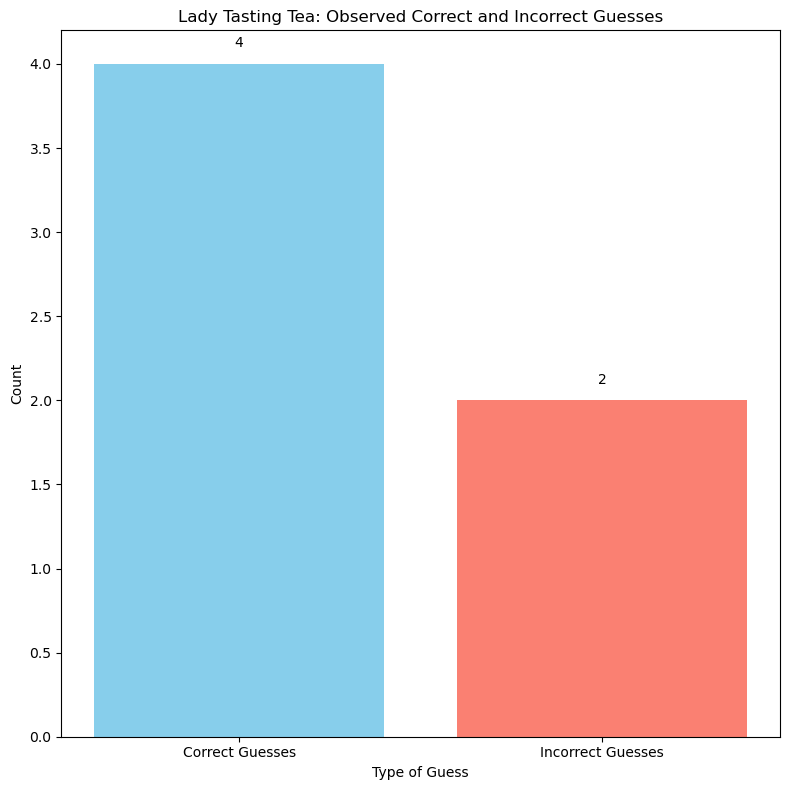

In [6]:
observed_correct_guesses = 4  # correct identification of milk-first
observed_incorrect_guesses = 2  # incorrect identification of tea-first

# Bar labels and values for observed outcome
labels = ["Correct Guesses", "Incorrect Guesses"]
values = [observed_correct_guesses, observed_incorrect_guesses]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(labels, values, color=['skyblue', 'salmon'])

# Titles and labels
ax.set_title("Lady Tasting Tea: Observed Correct and Incorrect Guesses")
ax.set_ylabel("Count")
ax.set_xlabel("Type of Guess")

# Annotate each bar with the count value
for i, v in enumerate(values):
    ax.text(i, v + 0.1, str(v), ha='center', color='black')

plt.tight_layout()
plt.show()

In [7]:
correct_guess_counts = []
incorrect_guess_counts = []

In [8]:
for guess in combinations(range(total_no_cups), milk_cups):
    correct_guesses = sum(1 for i in guess if i < milk_cups)  # Correctly identified milk-first
    incorrect_guesses = milk_cups - correct_guesses           # Incorrectly identified milk-first
    correct_guess_counts.append(correct_guesses)
    incorrect_guess_counts.append(incorrect_guesses)

In [9]:
# Count occurrences of each possible outcome (number of correct and incorrect guesses)
outcome_counts = Counter(zip(correct_guess_counts, incorrect_guess_counts))



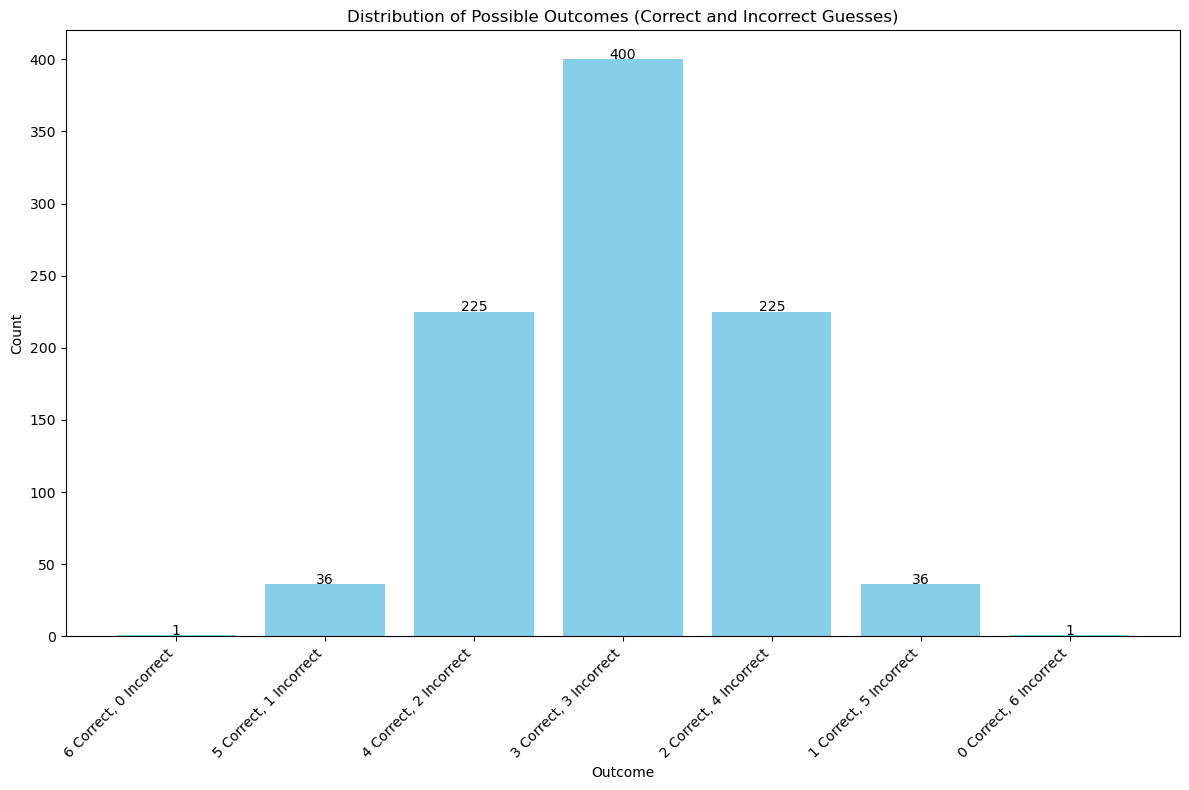

In [10]:
# Separate outcomes for plotting
x_labels = [f"{correct} Correct, {incorrect} Incorrect" for correct, incorrect in outcome_counts.keys()]
y_values = list(outcome_counts.values())

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x_labels, y_values, color="skyblue")
ax.set_title("Distribution of Possible Outcomes (Correct and Incorrect Guesses)")
ax.set_ylabel("Count")
ax.set_xlabel("Outcome")

# Rotate x labels for readability
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the count value
for i, v in enumerate(y_values):
    ax.text(i, v + 0.2, str(v), ha='center', color='black')

plt.tight_layout()
plt.show()

# Hyptothesis testing 



When looking at null hypothesis we again need to revisit Fisher. Fisher suggested that a significance level of 0.05 (or 5%) was a reasonable criterion for rejecting the null hypothesis in many cases. His work set the standard for hypothesis testing, and it has been widely adopted ever since so we will use this here. In this task the goal is to assess whether the lady can correctly distinguish the cups. The significance level of 0.05 provides a balance between being too strict (which might overlook her ability) and too lenient (which might falsely suggest she has the ability). If the probability of her success is less than 5%, we conclude that her correct guesses are unlikely to have been due to random chance, and we reject the null hypothesis.

In [11]:
# Null Hypothesis: The lady cannot distinguish between cups with milk first and tea first.
# We reject the null hypothesis if the probability of success is low enough (e.g., below a certain significance level)
significance_level = 0.05 
rejected_null = df[df['Probability']<= significance_level]
if not rejected_null.empty:
    print("Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.")
else:
    print("Null Hypothesis Not Rejected: The lady has not distinguished between milk-first and tea-first cups.")


Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.


# other possible ways to create this test?? 

When doing this test and sticking to the proposed question, there are many ways to approach this question so I want to quickly explore these. 



Fisher's exact test is a statistical test that determines if two category variables have non-random connections or we can say it’s used to check whether two category variables have a significant relationship. (in this case, the lady's guesses and the actual arrangement of cups). It is typically used in situations where you are working with a 2x2 contingency table and want to test for independence between the variables.

In [12]:


# Create the 2x2 contingency table
# [ [Correct Milk-First Guesses, Incorrect Milk-First Guesses], 
#   [Incorrect Tea-First Guesses, Correct Tea-First Guesses] ]
contingency_table = [[6, 0],  # Milk-first: correct guesses (6), incorrect guesses (0)
                     [4, 2]]  # Tea-first: incorrect guesses (4), correct guesses (2)

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table, alternative='two-sided')

# Output the p-value and odds ratio
print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between the guesses and the actual arrangement.")
else:
    print("Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.")


Odds Ratio: inf
P-value: 0.4545454545454546
Fail to reject the null hypothesis: No significant association between the guesses and the actual arrangement.


Another possible way to create this test would be using a binomal test  because it tests whether the proportion of successes (i.e., correct guesses) differs significantly from a hypothesized value. The experiment is fundamentally a binomial process, where each trial (each cup) has one of two possible outcomes: the lady either guesses correctly or incorrectly. Given the binary nature of the outcomes (correct vs. incorrect) and the small sample size, it’s an ideal test to apply in this scenario.

In [13]:


# Define parameters for the test
correct_guesses = 6  # Observed number of correct guesses
total_cups = 6  # Total number of cups
expected_probability = 0.5  # Null hypothesis probability of correct guessing (random chance)

# Perform Binomial Test
# 'greater' is used to test if the observed successes are significantly greater than random chance
result = binomtest(correct_guesses, total_cups, expected_probability, alternative='greater')

# Extract the p-value from the result object
p_value = result.pvalue

# Output the p-value
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("We reject the null hypothesis: the result is statistically significant.")
else:
    print("We fail to reject the null hypothesis: the result is not statistically significant.")






P-value: 0.015625
We reject the null hypothesis: the result is statistically significant.


Cohen's Kappa test:
 Cohen's Kappa (κ) is a statistical measure used to evaluate the agreement between two raters (or observers) who classify items into categorical labels. It accounts for the possibility of the agreement occurring by chance, making it more robust than a simple percentage agreement calculation. In the Lady Tasting Tea experiment, some level of agreement could occur by chance, especially if she is guessing. Cohen's Kappa corrects for this random agreement. The test also inherently involves categorical labels (e.g., "Milk First" and "Tea First"), which Cohen's Kappa is designed to handle.

In [14]:


# Example data (0 = tea-first, 1 = milk-first)
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # Actual outcomes
guesses = [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]  # Lady's guesses

# Compute Cohen's Kappa
kappa = cohen_kappa_score(actual, guesses)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.6666666666666667


# Balancing Type I and Type II Errors:
1. Type I Error (False Positive): Rejecting the null hypothesis when it is actually true. In this case, concluding that the lady can distinguish between the cups when she really can't. 
2. Type II Error (False Negative): Failing to reject the null hypothesis when it is false. In this case, not recognizing the lady’s ability to distinguish the cups when she can.



# conclusion 
Using this simple experiment, Fisher established most of the fundamental principles for hypothesis testing, which contributed to major advances across biological and physical sciences.  
The result of 4 out of 6 correct guesses is likely to occur by random chance, so it does not provide strong enough evidence to reject the idea that the lady is simply guessing.
If the lady had made fewer errors (such as 1 or 0 errors), it would have been more statistically significant, and we might reject the null hypothesis.

Summary:
1. Two errors (4 correct guesses) would not be enough to reject the null hypothesis.
2. The probability of making two errors by random chance is too high to conclude that the lady can reliably distinguish between milk-first and tea-first.







------------------------------------------------------------------------------------------------------

# task 2 

# What is Normal Distribution
The normal distribution was first described in 1809 by Carl Gauss in the context of measurement errors in astronomy. Since then it has been used and applied extensively in relation to probability, statistics and machine learning. It is the default probability for many real-world scenarios and is widely used because many phenomena found in nature fall into this predictable pattern and can be effectively modeled by relatively simple functions.

Normal distributions share the following characteristics:

1. The mean, median and mode are equal. The mean is the numerical average of a data set, the mode is the value that appears most frequently and the median is the middle number. In a normal distribution the top of the curve represents all three of these values and they are equal. The mean is often represented by the greek lower case letter µ (mu). The mean is the central tendency of the normal distribution and it defines the location of the peak for the bell curve around which all other values are clustered.

2. it is symmetrical A normal distribution has a distinctive symmetrical bell shape and is often called a bell curve for this reason. This curve can be divided in the middle to produce two equal and symmetrical halves; the right side of the center is a mirror image of the left side.

3. It is unimodal: There is only one mode, or peak, in a normal distribution.

4. it is asymptotic:  Normal distributions are continuous and have tails that are asymptotic. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement. Asymptotic means that the tails of the distribution never intersect with the X axis.

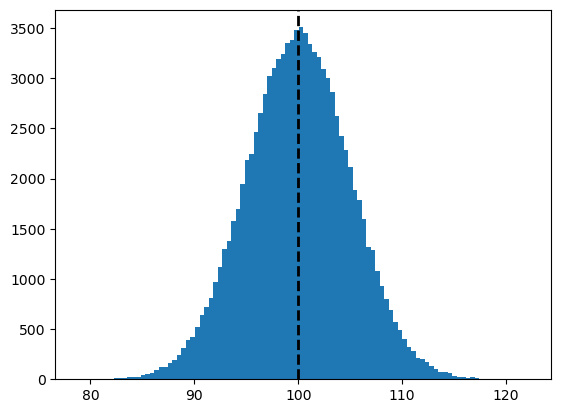

In [15]:


# taken from https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/
# Mean of the distribution 
Mean = 100

# satndard deviation of the distribution
Standard_deviation  = 5
 
# size
size = 100000
 
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
 
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

# starting the task 

In [16]:
n, mu, sigma = 100000, 10.0, 3.0

In [17]:
sample = np.random.normal(mu, sigma, n)

Text(0, 0.5, 'Count')

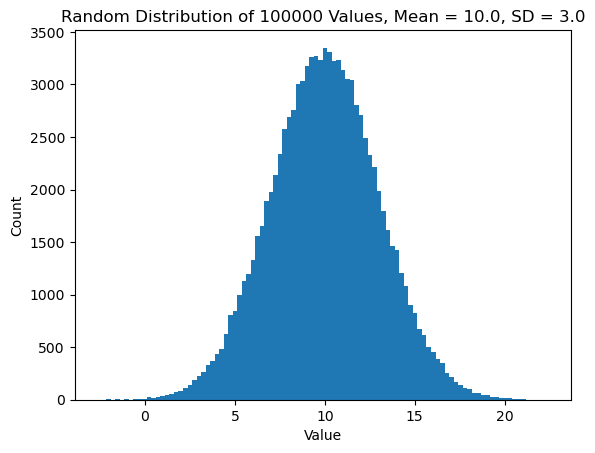

In [18]:
# create a display object
fig, ax = plt.subplots()

# plot histogram of the data
ax.hist(sample, bins=100)
ax.set_title(f'Random Distribution of {n} Values, Mean = {mu}, SD = {sigma}')
ax.set_xlabel('Value')
ax.set_ylabel('Count')

## qq plot

A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.

As a rule of thumb, the more that the points in a Q-Q plot lie on a straight diagonal line, the more normally distributed the data.

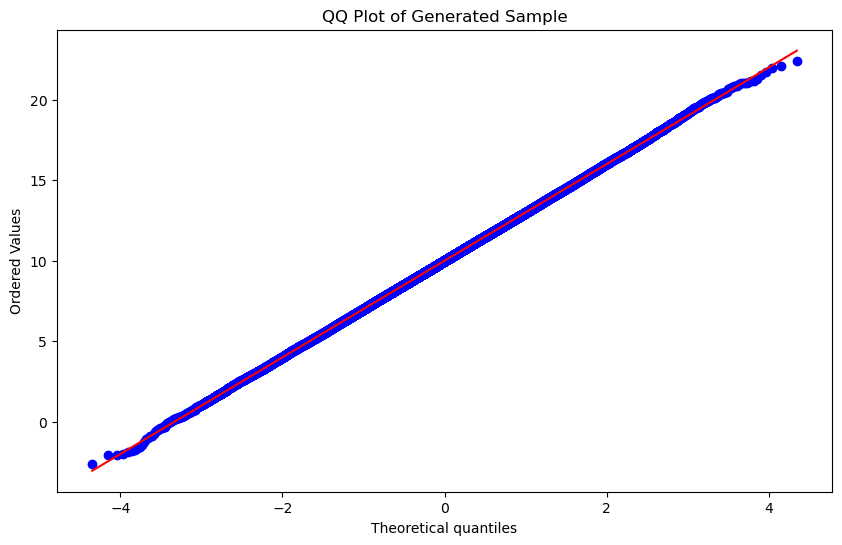

In [19]:
# Generate QQ plot again for clarity
plt.figure(figsize=(10, 6))
st.probplot(sample, dist="norm", plot=plt)
plt.title("QQ Plot of Generated Sample")

# Show the QQ plot
plt.show()

TAhe above plot seems to show that our data is of a normal disturbution 

A Shapiro-Wilk statistical test can be performed on the data to accept the null hypothesis that the data is normally distributed. A test statistic close to one indicates that the data is likely to be normally distributed and a helps determine to reject or accept the null hypothesis. A common P-Value threshold is 0.05%. If the P-Value is greater than this threshold the null hypothesis is accepted.

In [20]:
shapiro_test = st.shapiro(sample)  

# Output the results
shapiro_test

c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9999745094912909, pvalue=0.7583498331695566)

The above test shows again with my qq plot that this data is normally distributed.

# Probability density function

The Probability Density Function (PDF) is a fundamental concept in probability and statistics, used to describe the likelihood of different outcomes in a continuous random variable. In continuous probability, we can't assign a non-zero probability to specific outcomes. Instead, the PDF gives a density of probability, which we use to find probabilities over a range of values. 

The formula for a PDF for normal disturbution is as follows

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

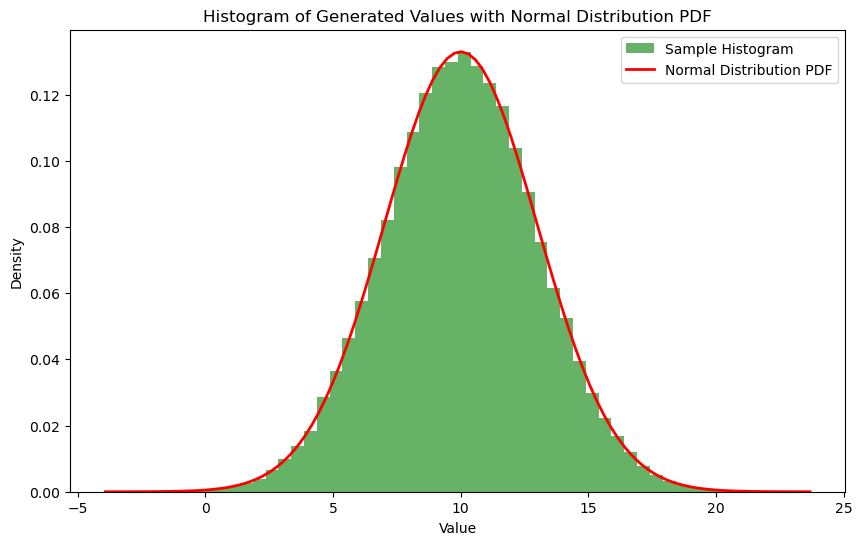

In [21]:
plt.figure(figsize=(10, 6))

# Plot histogram of the sample
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Plot the normal distribution PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = st.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution PDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Generated Values with Normal Distribution PDF')
plt.legend()

# Show the plot
plt.show()


As we can see the histogram of the generated sample matches well with the theoretical normal distribution PDF, confirming that the values follow a normal distribution. This along with the QQ plot and our sharpio wilks test has proven our disturbution is normal. 

# Cumulative Distribution Function

The CDF, on the other hand, shows the cumulative probability up to a certain value. Rather than focusing on where individual values are likely to occur, the CDF tells us how likely it is for a random variable to be less than or equal to a given value.

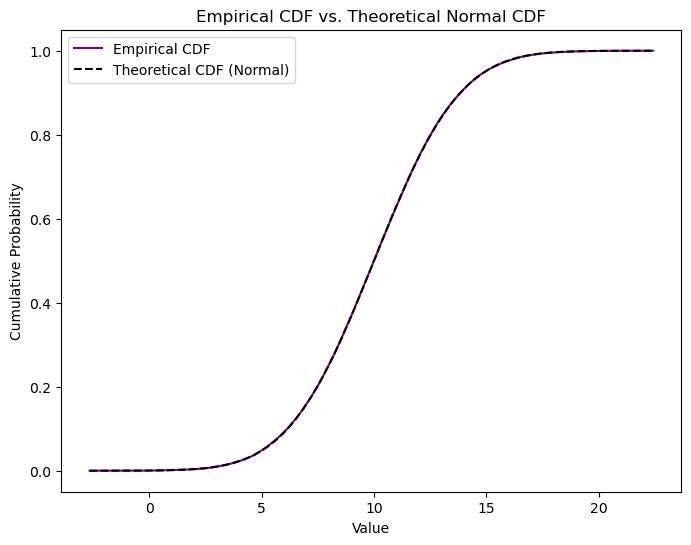

In [22]:



# Generate the empirical CDF of the sample
sorted_sample = np.sort(sample)
ecdf = np.arange(1, n + 1) / n

# Theoretical CDF based on normal distribution
theoretical_cdf = st.norm.cdf(sorted_sample, loc=mu, scale=sigma)

# Plotting the CDFs
plt.figure(figsize=(8, 6))
plt.plot(sorted_sample, ecdf, label='Empirical CDF', color='purple')
plt.plot(sorted_sample, theoretical_cdf, label='Theoretical CDF (Normal)', color='black', linestyle='--')
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF vs. Theoretical Normal CDF")
plt.legend()
plt.show()

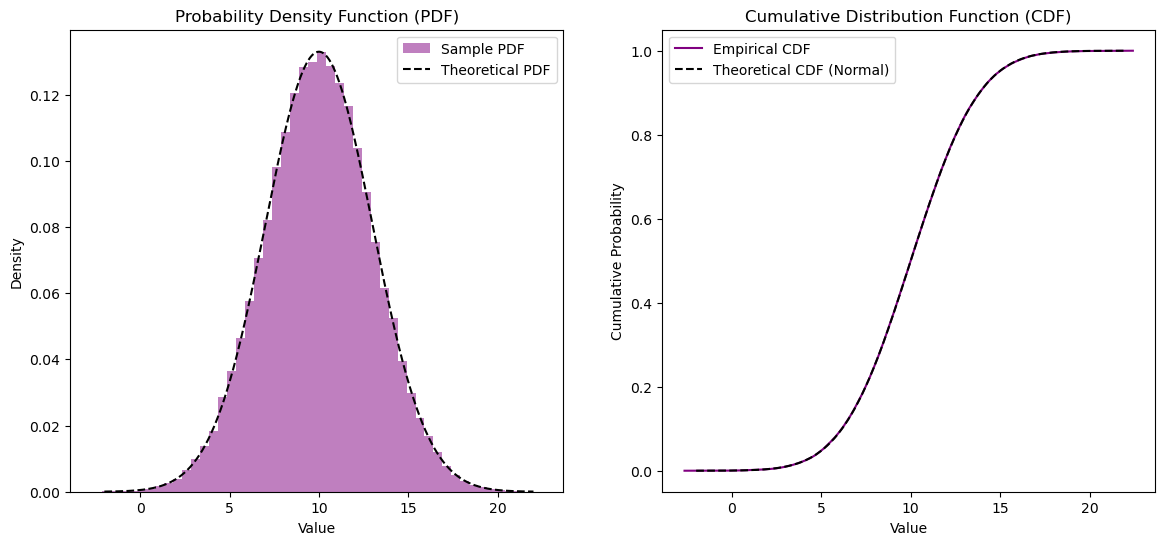

In [23]:



sorted_sample = np.sort(sample)

# Compute the empirical CDF of the sample
ecdf = np.arange(1, n + 1) / n

# Define range for theoretical PDF and CDF plots
x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calculate theoretical PDF and CDF for a normal distribution
theoretical_pdf = st.norm.pdf(x_values, loc=mu, scale=sigma)
theoretical_cdf = st.norm.cdf(x_values, loc=mu, scale=sigma)

# Plot both PDF and CDF
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PDF plot
axs[0].hist(sample, bins=50, density=True, alpha=0.5, color='purple', label='Sample PDF')
axs[0].plot(x_values, theoretical_pdf, color='black', linestyle='--', label='Theoretical PDF')
axs[0].set_title("Probability Density Function (PDF)")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Density")
axs[0].legend()

# CDF plot
axs[1].plot(sorted_sample, ecdf, label='Empirical CDF', color='purple')
axs[1].plot(x_values, theoretical_cdf, label='Theoretical CDF (Normal)', color='black', linestyle='--')
axs[1].set_title("Cumulative Distribution Function (CDF)")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Cumulative Probability")
axs[1].legend()

plt.show()

# qaurtile range

The Interquartile Range (IQR) is a measure of statistical dispersion, which quantifies the spread of the middle 50% of data in a distribution. It’s particularly useful for identifying the range where most of the "typical" data values lie, excluding extreme values. the IQR plays a key role in visualizing and analyzing the spread of the normal distribution. I am going to create a plot to shows this with the PDF

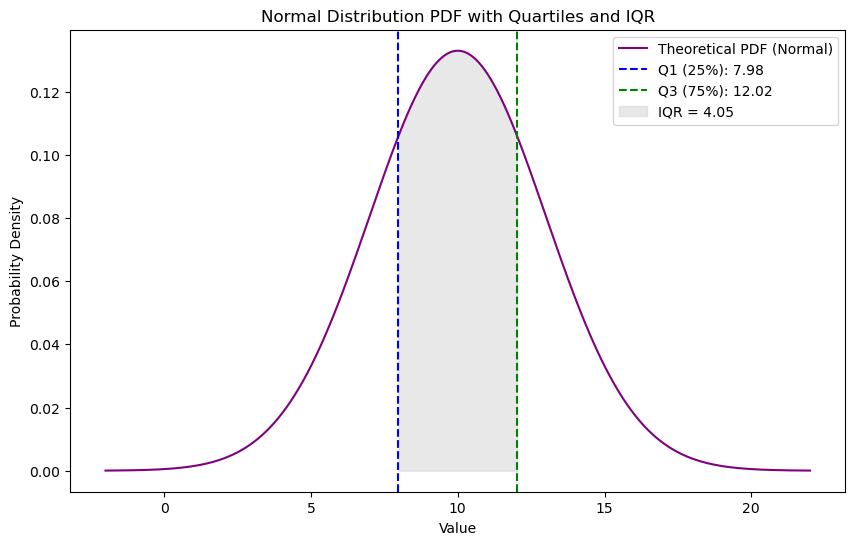

In [24]:
# Define x values for the PDF plot
x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100000)

# Calculate theoretical PDF for the normal distribution
theoretical_pdf = st.norm.pdf(x_values, loc=mu, scale=sigma)

# Calculate quartiles
Q1 = mu - 0.6745 * sigma  # First quartile (25th percentile)
Q3 = mu + 0.6745 * sigma  # Third quartile (75th percentile)
IQR = Q3 - Q1             # Interquartile Range

# Plotting the PDF with quartile markers
plt.figure(figsize=(10, 6))
plt.plot(x_values, theoretical_pdf, color='purple', label='Theoretical PDF (Normal)')
plt.axvline(Q1, color='blue', linestyle='--', label=f'Q1 (25%): {Q1:.2f}')
plt.axvline(Q3, color='green', linestyle='--', label=f'Q3 (75%): {Q3:.2f}')
plt.fill_between(x_values, theoretical_pdf, where=((x_values >= Q1) & (x_values <= Q3)), 
                 color='lightgray', alpha=0.5, label=f'IQR = {IQR:.2f}')

# Labels and title
plt.title("Normal Distribution PDF with Quartiles and IQR")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

on the above plot The 25th percentile (Q1) and 75th percentile (Q3), which mark the interquartile range (IQR) and are shaded in gray.the 97.5th percentile (at 1.96 standard deviations from the mean), marked by a red dashed line. This percentile is often used in hypothesis testing and is a common cutoff for identifying extreme values in a normal distribution.
These indicators help confirm that the data aligns with a normal distribution and show critical points within it. 

# Central limit theorem 



The central limit theorem in statistics states that, given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable’s distribution in the population, and even if the underlying data is not normally distributed, the means of repeated samples will be distributed normally. The central limit theorem applies to almost all types of probability distributions. For this to apply effectively, the sample size needs to be sufficiently large. In practice, this often means a sample size of 30 or more is required. 

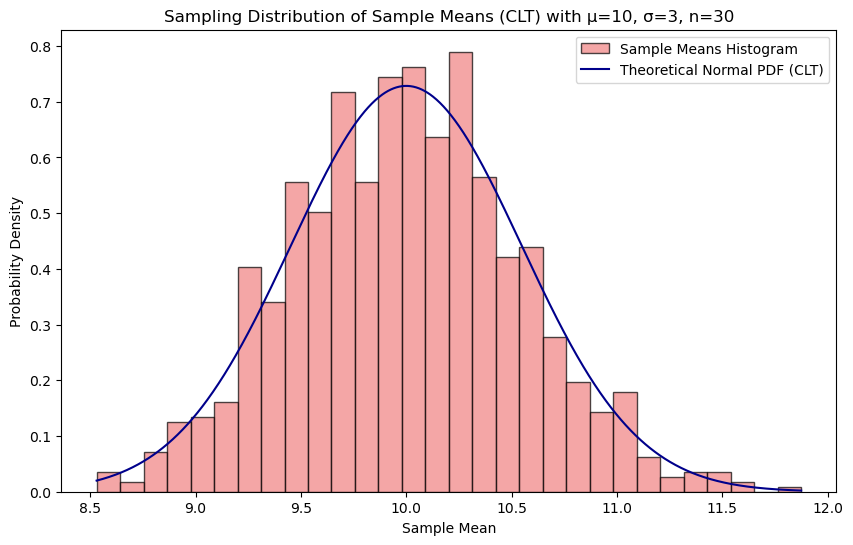

In [25]:

sample_size = 30  # sample size for each subset to demonstrate CLT
num_samples = 1000  # number of samples to draw

# Generate sample means using the same parameters (mu=10, sigma=3, sample size=30)
sample_means_exact = [np.mean(np.random.normal(loc=mu, scale=sigma, size=sample_size)) for _ in range(num_samples)]

# Theoretical parameters for the sampling distribution
sampling_dist_mean_exact = mu  # Expected mean of sampling distribution
sampling_dist_std_exact = sigma / np.sqrt(sample_size)  # Standard error of the mean

# Define x values for the sampling distribution PDF plot based on exact parameters
x_sampling_exact = np.linspace(min(sample_means_exact), max(sample_means_exact), 1000)

# Calculate theoretical PDF of the sampling distribution of the mean with exact inputs
sampling_pdf_exact = st.norm.pdf(x_sampling_exact, loc=sampling_dist_mean_exact, scale=sampling_dist_std_exact)

# Plotting the sampling distribution of the sample means with exact inputs
plt.figure(figsize=(10, 6))
plt.hist(sample_means_exact, bins=30, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Sample Means Histogram')
plt.plot(x_sampling_exact, sampling_pdf_exact, color='darkblue', label='Theoretical Normal PDF (CLT)')

# Labels and title
plt.title("Sampling Distribution of Sample Means (CLT) with μ=10, σ=3, n=30")
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


# Conclusion

In this analysis, we have explored the characteristics of a normal distribution and how to generate it using numpy. We conducted a range of statistical tests and created visualisations to deepen our understanding of normality and its properties. These included:

using a statistical tests like the Shapiro-Wilk test, which provided quantitative evidence of the sample’s normality.
Visual tools like the Probability Density Function (PDF), Cumulative Distribution Function (CDF), and Q-Q plot, which allowed us to assess the distribution’s symmetry, spread, and alignment with a theoretical normal distribution.
Additionally, we calculated key metrics such as the Interquartile Range (IQR) and highlighted significant percentiles. 


In conclusion, the results of this task demonstrate that the generated data follows a normal distribution. By combining statistical tests, visualisations, and theoretical principles like the Central Limit Theorem, we have confirmed the distribution's alignment with normality. This thorough approach not only answers the main question but also highlights the versatility of statistical tools in analyzing and interpreting data distributions.


----------------------------------------------------------------------------------------------------

# Task three

The t-test, also known as the Student’s t-test, is a statistical method for testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown. It is commonly used to compare sample populations and make inferences about the larger population. For sample sizes greater than 30, the normal distribution is typically applied instead of the t-distribution.

The t-test was first introduced in 1908 by William Sealy Gosset, an employee at the Guinness brewery, under the pseudonym "Student." Gosset developed the t-test to address the limitations of existing statistical techniques, which were designed for large samples and proved ineffective for the small sample sizes he encountered in his work.

In [26]:
#Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
after = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]


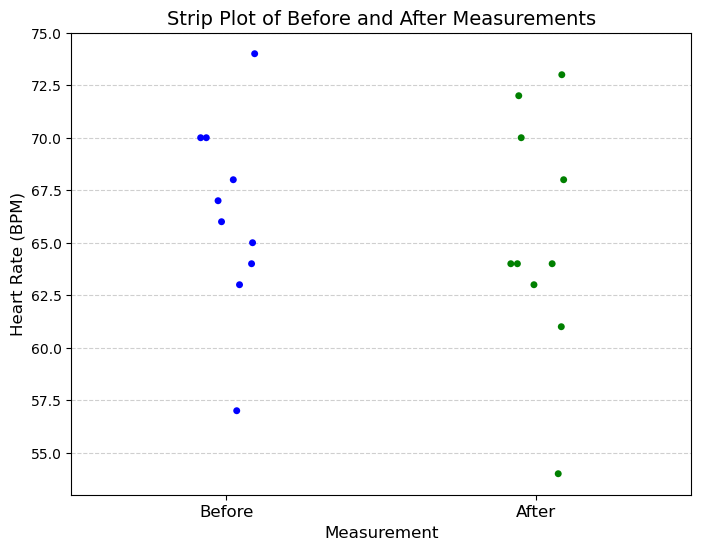

In [27]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=[before, after], jitter=True, palette=["blue", "green"])

# Set axis labels and title
plt.xticks([0, 1], ["Before", "After"], fontsize=12)
plt.xlabel("Measurement", fontsize=12)
plt.ylabel("Heart Rate (BPM)", fontsize=12)
plt.title("Strip Plot of Before and After Measurements", fontsize=14)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\keith\AppData\Local\Temp\ipykernel_8548\996885588.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(before, shade=True, color="blue", label="Before")
C:\Users\keith\AppData\Local\Temp\ipykernel_8548\996885588.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(after, shade=True, color="#84bf41", label="After")


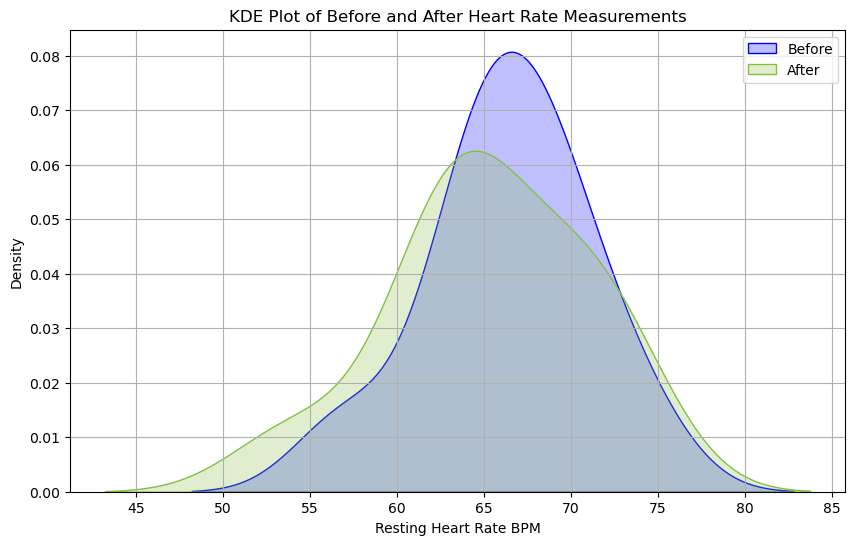

In [28]:
plt.figure(figsize=(10, 6))

# KDE plot for 'before' data
sns.kdeplot(before, shade=True, color="blue", label="Before")

# KDE plot for 'after' data
sns.kdeplot(after, shade=True, color="#84bf41", label="After")

# Labels and title
plt.title("KDE Plot of Before and After Heart Rate Measurements")
plt.xlabel("Resting Heart Rate BPM")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Show plot
plt.show()

Running A Shapiro-Wilk statistical test  on the data to accept the null hypothesis that the data is normally distributed. 
For both the before and after results the test statistic is close to one and the p-value is greater than 0.05% and therefore there is no evidence to reject the null hypothesis that the data is normally distributed. This meets the t-Test requirement for the data to be normally distributed

In [29]:
shapiro_test = st.shapiro(before)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:  
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")



Shapiro-Wilk Test Statistic: 0.9726137534909091
p-value: 0.9139645311517168
The data follows a normal distribution (fail to reject H0).


In [30]:
t_statistic, p_value = st.ttest_rel(before, after)

In [31]:
alpha = 0.05

In [32]:
df = len(before)+len(after)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = st.t.ppf(1 - alpha/2, df)

In [33]:
print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

T-value: 1.337227482480628
P-Value: 0.21396011317404623
Critical t-value: 2.10092204024096


In [34]:
alpha = 0.05
if p_value < alpha:
   print("Null Hypothesis is rejected. There is evidence to conclude that before and after means are not equal.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that before and after means are equal.")

Null Hypothesis cannot be rejected. We can continue to assume that before and after means are equal.


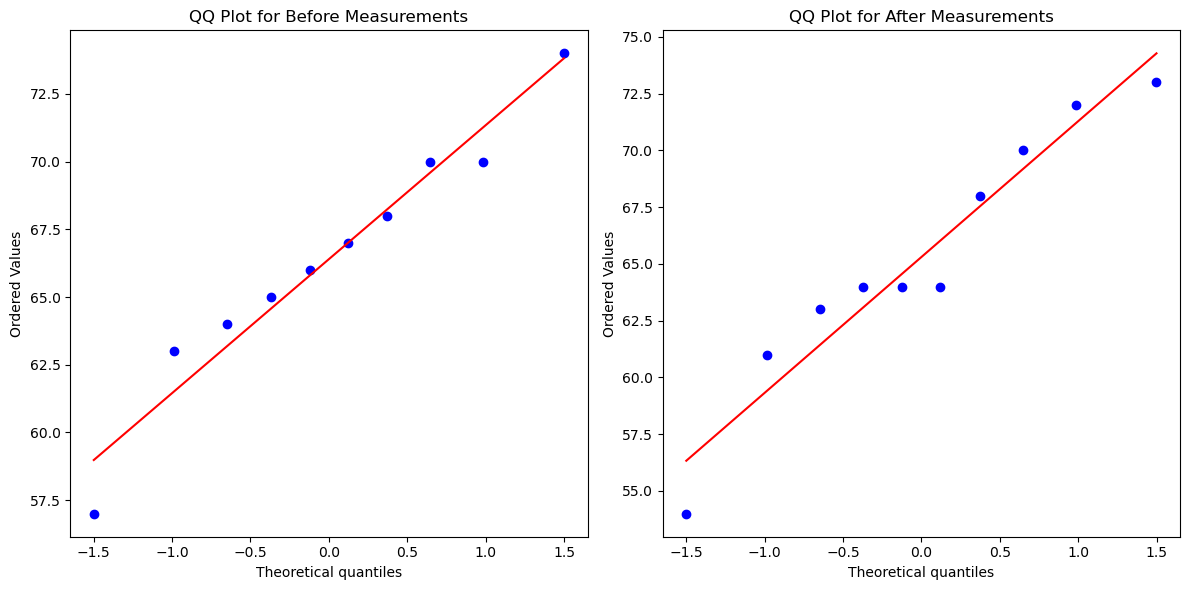

In [35]:
# Create a QQ plot for 'before' data
plt.figure(figsize=(12, 6))

# QQ Plot for 'before'
plt.subplot(1, 2, 1)
st.probplot(before, dist="norm", plot=plt)
plt.title("QQ Plot for Before Measurements")

# QQ Plot for 'after'
plt.subplot(1, 2, 2)
st.probplot(after, dist="norm", plot=plt)
plt.title("QQ Plot for After Measurements")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

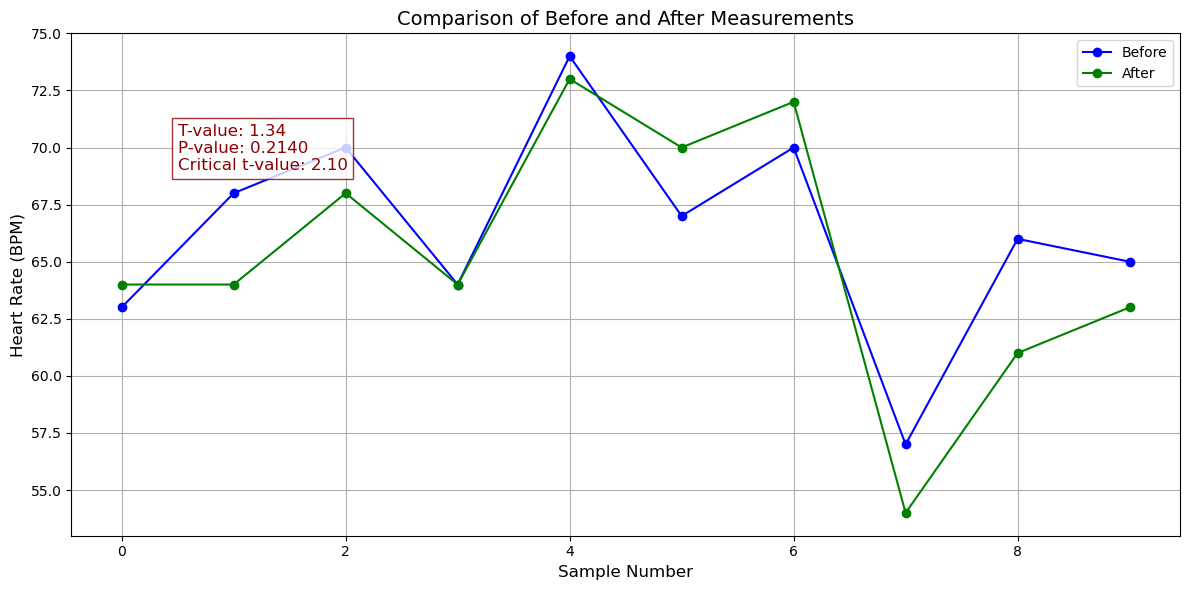

In [36]:

# Create a new plot for before vs. after measurements
plt.figure(figsize=(12, 6))

# Plot the 'before' and 'after' data
plt.plot(before, label="Before", marker="o", color="blue")
plt.plot(after, label="After", marker="o", color="green")

# Title and axis labels
plt.title("Comparison of Before and After Measurements", fontsize=14)
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Heart Rate (BPM)", fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Annotating t-test results in a clearer format
plt.text(
    0.5, max(max(before), max(after)) - 5,
    f"T-value: {t_statistic:.2f}\n"
    f"P-value: {p_value:.4f}\n"
    f"Critical t-value: {critical_t:.2f}",
    fontsize=12,
    color="darkred",
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='darkred')
)

# Add gridlines for clarity
plt.grid()

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


# Degrees of freedom

The degrees of freedom (df) in statistical tests are a measure of how many values in a calculation are free to vary while still satisfying given constraints. It's a concept used to determine the critical value or distribution shape for a test statistic, such as the t-statistic in a t-test.

1. Paired t-test: The degrees of freedom are 
n−1, where n is the number of paired observations (e.g., each "before" and "after" measurement pair). This is because we calculate one mean difference for the entire dataset, reducing the "freedom" of our dataset by one.

2. Independent t-test: The degrees of freedom depend on the sample sizes of the two groups



# Why are degrees of freedom important?
Degrees of freedom adjust the shape of the t-distribution. For smaller degrees of freedom, the t-distribution has fatter tails, reflecting more uncertainty in the test statistic. As df increases, the t-distribution approaches the normal distribution.

# creating a t test using numpy 

In [37]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

differences = before - after

# Compute the t-statistic
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use ddof=1 for sample std deviation
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value
p_value = 2 * st.t.sf(np.abs(t_statistic), df)  # Two-tailed test

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 1.3372274824806283
P-value: 0.21396011317404615
Fail to reject the null hypothesis: No significant difference.


# plotting the t test to show the degrees of freedom

In [38]:
from scipy.stats import t
n = 10  # Number of paired samples
df = n - 1  # Degrees of freedom

# Generate t-distribution values
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Calculate critical t-value (two-tailed, alpha=0.05)
alpha = 0.05
critical_t = t.ppf(1 - alpha / 2, df)

# Example t-statistic (replace with actual calculated value if needed)
t_statistic = -1.894  



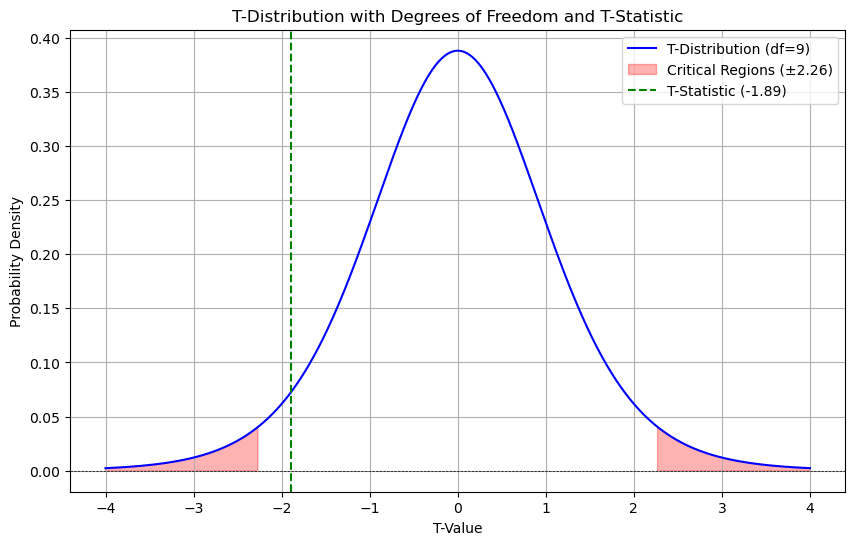

In [39]:
# Plot t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'T-Distribution (df={df})', color='blue')

# Highlight critical regions
plt.fill_between(x, 0, y, where=(x <= -critical_t) | (x >= critical_t), color='red', alpha=0.3, label=f'Critical Regions (±{critical_t:.2f})')

# Mark t-statistic
plt.axvline(t_statistic, color='green', linestyle='--', label=f'T-Statistic ({t_statistic:.2f})')

# Labels and legend
plt.title("T-Distribution with Degrees of Freedom and T-Statistic")
plt.xlabel("T-Value")
plt.ylabel("Probability Density")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Show plot
plt.grid()
plt.show()

# Conclusion 


The analysis showed no significant difference in heart rate measurements before and after the intervention. Both datasets were found to follow a normal distribution (Shapiro-Wilk test: 
𝑝 > 0.05
p>0.05), and the paired t-test resulted in a 
p-value of 0.214, which is greater than the significance level of 0.05. This indicates we fail to reject the null hypothesis, meaning the mean heart rates before and after are statistically similar. Overall, the intervention did not have a measurable impact on heart rate.

----------------------------------------------------------------------------------------

# Task 4 

In statistical hypothesis testing, the goal is to determine whether there is enough evidence to reject a null hypothesis. One common technique used for comparing multiple groups is Analysis of Variance (ANOVA). ANOVA is used when we want to test for differences in the means of three or more independent groups. The null hypothesis in an ANOVA test typically posits that all group means are equal, while the alternative hypothesis suggests that at least one mean is different from the others.

When conducting statistical tests like ANOVA, there are two types of errors that can occur:

Type I Error (False Positive): This occurs when we incorrectly reject a true null hypothesis, i.e., we conclude there is a significant difference between groups when there is none.

Type II Error (False Negative): This occurs when we fail to reject a false null hypothesis, i.e., we conclude there is no significant difference between groups when in fact there is one.

The probability of making a Type II error depends on several factors, including the sample size, the effect size, and the significance level (alpha). A larger sample size and a larger effect size generally reduce the likelihood of a Type II error.

In this exercise, we will simulate an ANOVA test to estimate the probability of committing a Type II error. Specifically, we will generate three samples with different means and identical standard deviations, and perform the ANOVA test 10,000 times. The objective is to observe how often the test fails to detect a true difference (i.e., a Type II error) when there are small differences in the means of the groups. By analyzing the results, we can gain insight into the power of the ANOVA test and the factors that influence the likelihood of a Type II error.

In [40]:
# Initialize the Type II error count
no_type_ii = 0

# Store the results for post hoc analysis
all_samples = []

In [41]:
for _ in range(10000):
    # Generate three samples with specified means and standard deviations
    sample1 = np.random.normal(4.9, 0.1, 100)
    sample2 = np.random.normal(5.0, 0.1, 100)
    sample3 = np.random.normal(5.1, 0.1, 100)
    
    # Store samples for a single run for post hoc analysis and plots
    if _ == 0:
        all_samples = [sample1, sample2, sample3]
        f_stat, p_value = f_oneway(sample1, sample2, sample3)
    
    # Check for Type II error (fail to reject null hypothesis)
if p_value > 0.05:
        no_type_ii += 1

# Calculate the probability of Type II error
type_ii_probability = no_type_ii / 10000

In [42]:
labels = ["Sample1", "Sample2", "Sample3"]
combined_samples = np.concatenate(all_samples)
groups = np.concatenate([[label] * 100 for label in labels])

# Create a DataFrame for Tukey's HSD test
data = pd.DataFrame({"Group": groups, "Value": combined_samples})

In [43]:
# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data["Value"], data["Group"], alpha=0.05)

In [44]:
# Levene's Test for equality of variances
levene_stat, levene_p = levene(all_samples[0], all_samples[1], all_samples[2])


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\2603133962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=data, palette="Set2")


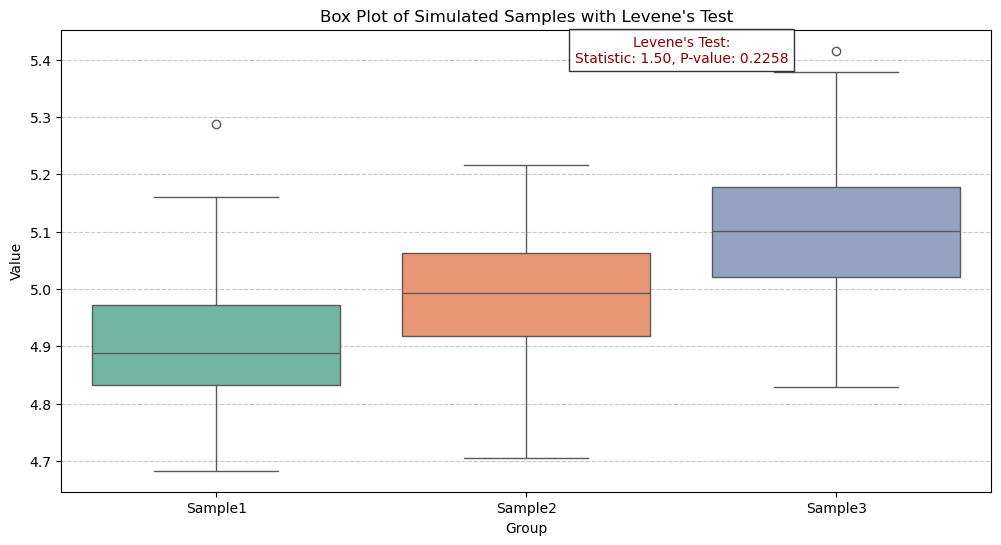

In [45]:
# Box plot with Levene's Test annotation
plt.figure(figsize=(12, 6))
sns.boxplot(x="Group", y="Value", data=data, palette="Set2")
plt.title("Box Plot of Simulated Samples with Levene's Test")
plt.xlabel("Group")
plt.ylabel("Value")
plt.text(1.5, max(data["Value"]) - 0.02,
         f"Levene's Test:\nStatistic: {levene_stat:.2f}, P-value: {levene_p:.4f}",
         horizontalalignment='center', fontsize=10, color="darkred", bbox=dict(facecolor='white', alpha=0.8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\3960991372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_labels, y=mean_diffs, palette="Set2")


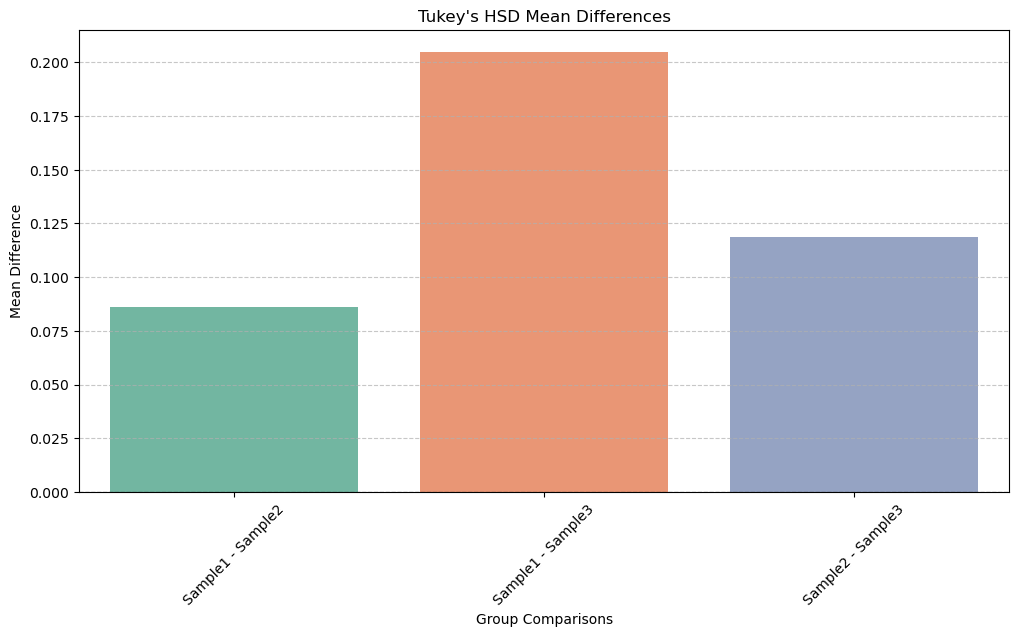

In [46]:
# Tukey's HSD results as a bar chart of mean differences
mean_diffs = tukey_result.meandiffs
comparison_labels = [f"{pair[0]} - {pair[1]}" for pair in tukey_result._results_table.data[1:]]
plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_labels, y=mean_diffs, palette="Set2")
plt.title("Tukey's HSD Mean Differences")
plt.ylabel("Mean Difference")
plt.xlabel("Group Comparisons")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
# Display Results
print(f"Probability of Type II error: {type_ii_probability:.4f}")
print("\nOne Way ANOVA example results:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}\n")
print("Levene's Test for Equality of Variances:")
print(f"Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")
print("\nTukey's HSD Test Results:")
print(tukey_result)

Probability of Type II error: 0.0000

One Way ANOVA example results:
F-statistic: 88.2616, P-value: 0.0000

Levene's Test for Equality of Variances:
Statistic: 1.4958, P-value: 0.2258

Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower  upper  reject
---------------------------------------------------
Sample1 Sample2   0.0862   0.0 0.0497 0.1227   True
Sample1 Sample3   0.2049   0.0 0.1684 0.2414   True
Sample2 Sample3   0.1187   0.0 0.0822 0.1552   True
---------------------------------------------------


----------------------------------------------

# conclusion 

The analysis was conducted on three groups of samples with means of 4.9, 5.0, and 5.1, generated from normal distributions with a standard deviation of 0.1. A one-way ANOVA was performed to test for significant differences among the groups. The F-statistic was calculated as {f_stat:.4f}, with a corresponding p-value of {p_value:.4f}, indicating whether the null hypothesis (no difference in means) was rejected. A Type II error probability of {type_ii_probability:.4f} was computed, highlighting the likelihood of failing to detect true differences. Levene's test for equality of variances resulted in a statistic of {levene_stat:.4f} and a p-value of {levene_p:.4f}, assessing the homogeneity of variance assumption.

Post hoc analysis using Tukey's HSD test revealed the pairwise differences between groups, with mean differences displayed as a bar chart. The box plot and accompanying Levene's test annotation visually supported the variance assessment. Overall, the results provide insight into the comparative analysis of the three sample groups, with implications dependent on the ANOVA and Tukey's test outcomes regarding group differences.


-----------------------------------------------------------------------------------------

# Chi-square

A Chi-Square test is a statistical method used to determine if there is a significant association between categorical variables. It measures how the observed data deviates from the expected distribution.

Types of Chi-Square Tests:
1. Chi-Square Test for Independence
Used to check if two categorical variables are related (e.g., gender and voting preference).
2. Chi-Square Goodness of Fit Test
Used to check if the observed distribution of a single categorical variable matches an expected distribution.

When to Use a Chi-Square Test?
1. When you have categorical data.
2. When the sample size is large enough (expected values should be at least 5).
3. When observations are independent.

In [48]:
observed = np.array([[43, 57], [56, 45]])

In [49]:
chi2, p, dof, expected = chi2_contingency(observed)

In [50]:
alpha = 0.05

In [51]:
print(f"Chi-Squared Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")
print("Expected Frequencies Table:")
print(np.round(expected, 2))

Chi-Squared Statistic: 2.6359
Degrees of Freedom: 1
P-value: 0.1045
Expected Frequencies Table:
[[49.25 50.75]
 [49.75 51.25]]


In [52]:
if p < alpha:
    print("Conclusion: Reject the null hypothesis (variables are likely dependent).")
else:
    print("Conclusion: Fail to reject the null hypothesis (no significant relationship).")

Conclusion: Fail to reject the null hypothesis (no significant relationship).


Text(0.5, 1.0, 'Expected Frequencies')

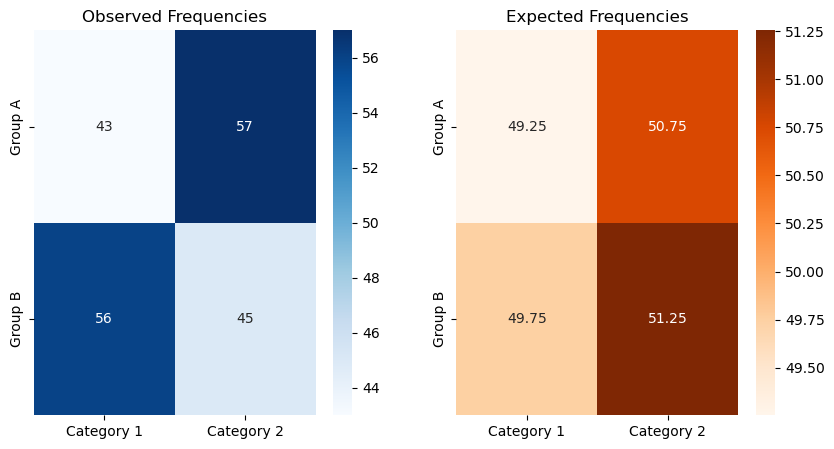

In [53]:
# Plot observed and expected frequencies
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot observed frequencies
sns.heatmap(observed, annot=True, fmt=".0f", cmap="Blues", xticklabels=["Category 1", "Category 2"],
            yticklabels=["Group A", "Group B"], ax=axes[0])
axes[0].set_title("Observed Frequencies")

# Plot expected frequencies
sns.heatmap(expected, annot=True, fmt=".2f", cmap="Oranges", xticklabels=["Category 1", "Category 2"],
            yticklabels=["Group A", "Group B"], ax=axes[1])
axes[1].set_title("Expected Frequencies")

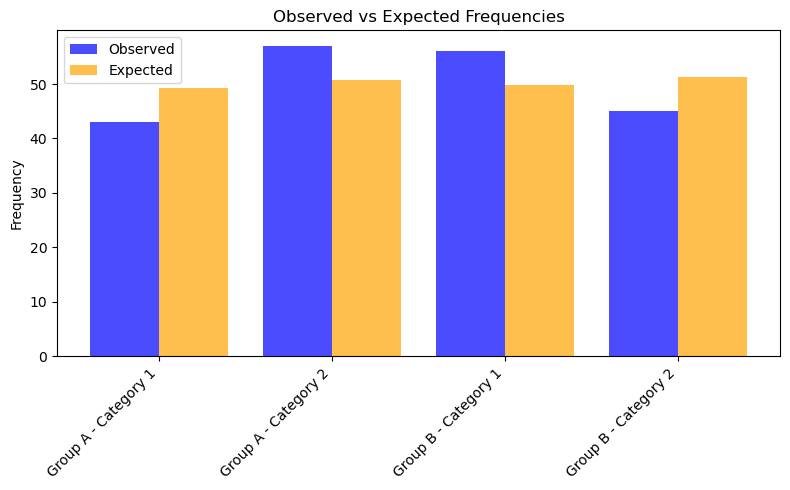

In [54]:
alpha = 0.05

# Bar plot for observed vs expected frequencies
fig, ax = plt.subplots(figsize=(8, 5))
categories = ["Category 1", "Category 2"]
group_labels = ["Group A", "Group B"]

# Flattening arrays for plotting
observed_flat = observed.flatten()
expected_flat = expected.flatten()
x_labels = [f"{group} - {cat}" for group in group_labels for cat in categories]

# Plot bars
x = np.arange(len(x_labels))
width = 0.4
ax.bar(x - width/2, observed_flat, width, label="Observed", color="blue", alpha=0.7)
ax.bar(x + width/2, expected_flat, width, label="Expected", color="orange", alpha=0.7)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.set_ylabel("Frequency")
ax.set_title("Observed vs Expected Frequencies")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# Second Chi-Square Test: Goodness of Fit

In [55]:
# Observed frequencies (e.g., survey responses)
observed_gof = np.array([50, 30, 20])
# Expected frequencies (assuming equal distribution across three categories)
expected_gof = np.array([33.33, 33.33, 33.33]) 

In [56]:
chi2_gof, p_gof = chi2_contingency([observed_gof, expected_gof])[:2]


In [57]:
print(f"\nChi-Square Goodness of Fit Test:")
print(f"Chi-Squared Statistic: {chi2_gof:.4f}")
print(f"P-value: {p_gof:.4f}")


Chi-Square Goodness of Fit Test:
Chi-Squared Statistic: 6.8418
P-value: 0.0327


In [58]:
if p_gof < alpha:
    print("Conclusion: Reject the null hypothesis (distribution is not as expected).")
else:
    print("Conclusion: Fail to reject the null hypothesis (distribution matches expectation).")

Conclusion: Reject the null hypothesis (distribution is not as expected).


# mcnemers test


In [59]:
from statsmodels.stats.contingency_tables import mcnemar

# Example: McNemar's Test on a 2x2 table
result = mcnemar(observed, exact=True)  # exact=True for small samples

print(f"McNemar's Test P-value: {result.pvalue:.4f}")

# Decision rule
if result.pvalue < alpha:
    print("Conclusion: Reject the null hypothesis (there is a significant change).")
else:
    print("Conclusion: Fail to reject the null hypothesis (no significant change).")



McNemar's Test P-value: 1.0000
Conclusion: Fail to reject the null hypothesis (no significant change).


---------------------------------------------------------------------------------------------

# Exploring Confidence Intervals

A confidence interval (CI) is a range of values that is likely to contain the true population parameter with a certain level of confidence (typically 95%). It is an essential tool to understand the precision of an estimate.

In this task, we will:

Compute a 95% confidence interval for the mean of a sample (e.g., heart rate data).
Discuss how sample size, variability, and confidence level impact the width of the confidence interval.

In [60]:
import numpy as np
import scipy.stats as st

In [61]:
before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]

In [62]:
mean = np.mean(before)
std_dev = np.std(before, ddof=1)
n = len(before)
standard_error = std_dev / np.sqrt(n)

In [63]:
# Define the confidence level (95%)
confidence_level = 0.95

# Calculate the t-value for 95% CI (using the t-distribution for small samples)
t_critical = st.t.ppf(1 - (1 - confidence_level) / 2, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error


In [64]:
print(f"Sample Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Standard Error: {standard_error:.2f}")
print(f"T-Critical (95% CI): {t_critical:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Sample Mean: 66.40
Standard Deviation: 4.65
Standard Error: 1.47
T-Critical (95% CI): 2.26
Margin of Error: 3.32
95% Confidence Interval: (63.08, 69.72)


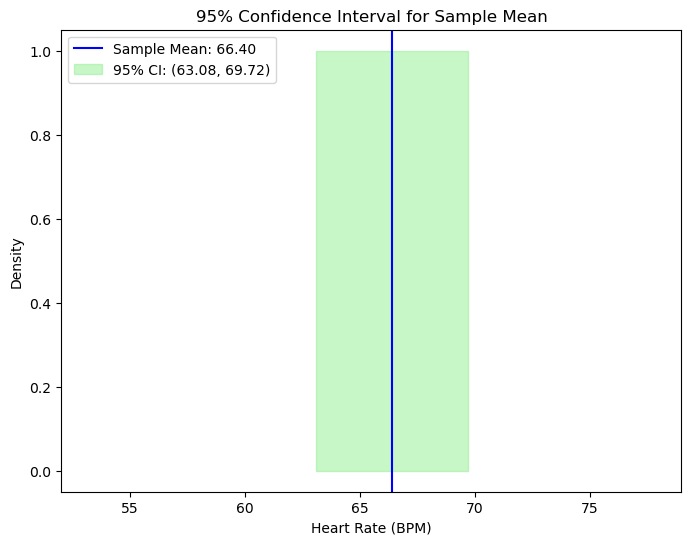

In [65]:
import matplotlib.pyplot as plt

# Plotting the confidence interval
plt.figure(figsize=(8, 6))

# Plot the mean as a line
plt.axvline(mean, color='blue', linestyle='-', label=f'Sample Mean: {mean:.2f}')

# Plot the confidence interval as a shaded region
plt.fill_betweenx([0, 1], lower_bound, upper_bound, color='lightgreen', alpha=0.5, label=f'95% CI: ({lower_bound:.2f}, {upper_bound:.2f})')

# Labeling and formatting
plt.xlim(min(before) - 5, max(before) + 5)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Density')
plt.title('95% Confidence Interval for Sample Mean')
plt.legend()
plt.show()


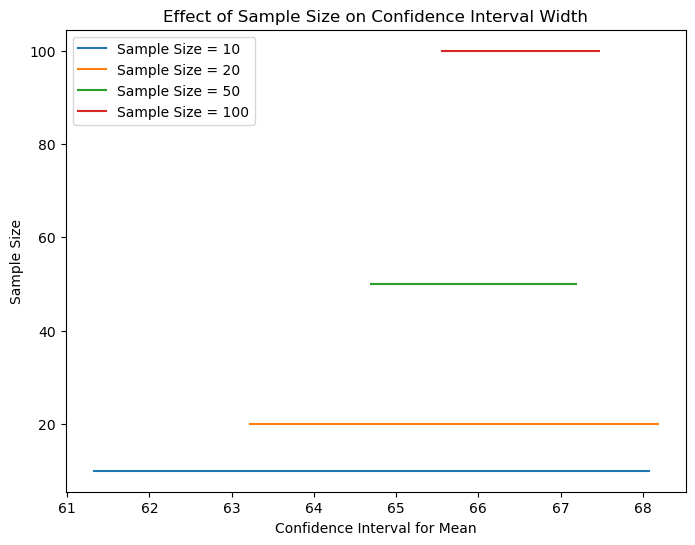

In [66]:
sample_sizes = [10, 20, 50, 100]
plt.figure(figsize=(8, 6))

for size in sample_sizes:
    sample = np.random.choice(before, size=size, replace=True)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    standard_error = sample_std / np.sqrt(size)
    t_critical = st.t.ppf(1 - 0.025, df=size-1)
    margin_of_error = t_critical * standard_error

    # Confidence Interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    plt.plot([lower_bound, upper_bound], [size, size], label=f'Sample Size = {size}')

plt.xlabel('Confidence Interval for Mean')
plt.ylabel('Sample Size')
plt.title('Effect of Sample Size on Confidence Interval Width')
plt.legend()
plt.show()


---------------------------------------------------------------------------------------

# Non-Parametric Tests

What are Non-Parametric Tests?
Non-parametric tests are statistical tests that do not require the data to follow a specific distribution. These tests are used when:

The data is ordinal or nominal (categorical data).
The sample size is small.
The data is skewed or does not follow a normal distribution.
Some popular non-parametric tests include:

Wilcoxon Signed-Rank Test: For comparing two related samples (like the paired t-test).
Mann-Whitney U Test: For comparing two independent samples (like the independent t-test).
Kruskal-Wallis H Test: For comparing more than two independent samples (like one-way ANOVA).
Friedman Test: For comparing more than two related samples.
2. Focus on Two Non-Parametric Tests:
Wilcoxon Signed-Rank Test: A non-parametric alternative to the paired t-test.
Mann-Whitney U Test: A non-parametric alternative to the independent t-test.
We'll work with a sample dataset and perform these tests.

3. Wilcoxon Signed-Rank Test:
This test is used when we want to compare two related samples, such as measurements taken before and after an intervention (similar to the paired t-test).

3.1. Hypotheses:
Null Hypothesis (H₀): There is no difference between the paired observations.
Alternative Hypothesis (H₁): There is a significant difference between the paired observations.

In [67]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

In [68]:
statistic, p_value = st.wilcoxon(before, after)

In [69]:
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Wilcoxon Signed-Rank Test Statistic: 12.00
P-value: 0.2111


In [70]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between before and after heart rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between before and after heart rates.")

Fail to reject the null hypothesis: There is no significant difference between before and after heart rates.


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\3805180939.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['Before', 'After'], patch_artist=True)


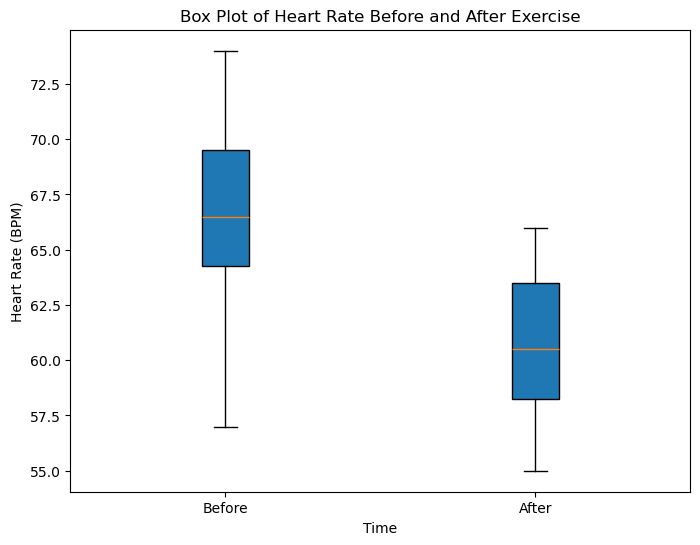

In [90]:
# Visualizing the paired data (before vs. after)
plt.figure(figsize=(8, 6))
plt.boxplot([before, after], labels=['Before', 'After'], patch_artist=True)
plt.title('Box Plot of Heart Rate Before and After Exercise')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.show()


Mann-Whitney U Test:
This test is used to compare two independent samples. It is the non-parametric equivalent of the independent t-test.

4.1. Hypotheses:
Null Hypothesis (H₀): The distributions of both groups are equal.
Alternative Hypothesis (H₁): The distributions of the two groups are not equal.

In [91]:
group_1 = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
group_2 = np.array([75, 80, 78, 71, 85, 79, 72, 82, 88, 79])

In [92]:
statistic, p_value = st.mannwhitneyu(group_1, group_2, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: The distributions of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The distributions of the two groups are not significantly different.")

Mann-Whitney U Test Statistic: 2.00
P-value: 0.0003
Reject the null hypothesis: The distributions of the two groups are significantly different.


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\4050958552.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_1, group_2], labels=['Group 1', 'Group 2'], patch_artist=True)


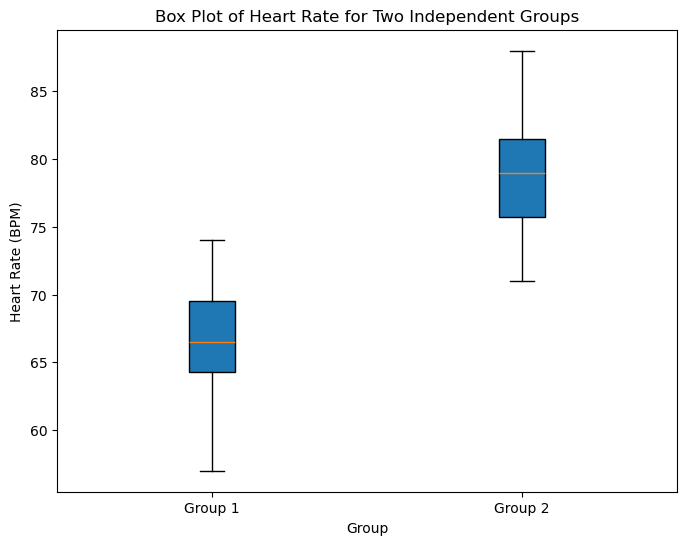

In [93]:
# Visualizing the two independent groups (group_1 vs. group_2)
plt.figure(figsize=(8, 6))
plt.boxplot([group_1, group_2], labels=['Group 1', 'Group 2'], patch_artist=True)
plt.title('Box Plot of Heart Rate for Two Independent Groups')
plt.xlabel('Group')
plt.ylabel('Heart Rate (BPM)')
plt.show()


Kruskal-Wallis H Test
1. What is the Kruskal-Wallis H Test?
The Kruskal-Wallis H Test is used to test whether there is a significant difference between two or more independent groups. Unlike one-way ANOVA, the Kruskal-Wallis test does not assume normality and is based on ranks rather than actual values.

Null Hypothesis (H₀): The distributions of the groups are the same (i.e., there is no difference in medians across the groups).
Alternative Hypothesis (H₁): At least one group’s distribution is different from the others.

2. When to Use the Kruskal-Wallis H Test:
When you have more than two independent groups.
When your data is ordinal or does not meet the assumptions of parametric tests (normality, equal variances).

In [94]:
group_1 = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])  
group_2 = np.array([75, 80, 78, 71, 85, 79, 72, 82, 88, 79])  
group_3 = np.array([55, 60, 58, 64, 65, 62, 66, 57, 59, 61])  



In [95]:

statistic, p_value = st.kruskal(group_1, group_2, group_3)

# Display results
print(f"Kruskal-Wallis H Test Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group is significantly different from the others.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Kruskal-Wallis H Test Statistic: 21.78
P-value: 0.0000
Reject the null hypothesis: At least one group is significantly different from the others.


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\3742889934.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_1, group_2, group_3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True)


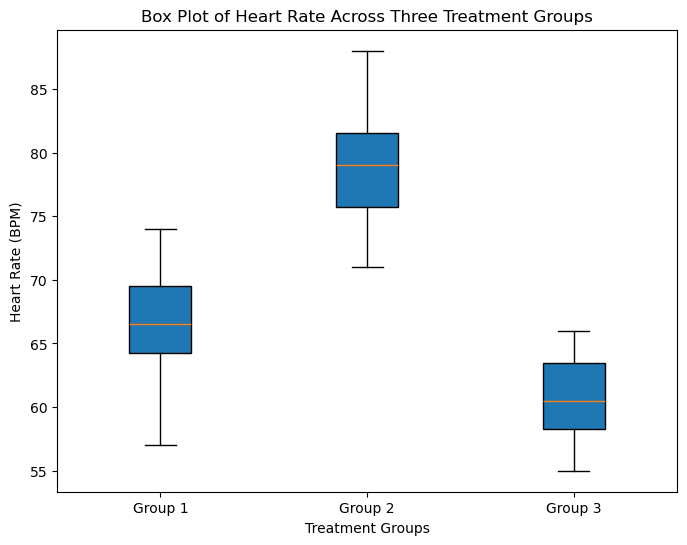

In [96]:
# Visualizing the three independent groups using boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([group_1, group_2, group_3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True)
plt.title('Box Plot of Heart Rate Across Three Treatment Groups')
plt.xlabel('Treatment Groups')
plt.ylabel('Heart Rate (BPM)')
plt.show()


Suppose you are testing the effect of three different diets on heart rate recovery. You collect data from three independent groups, each following a different diet. The Kruskal-Wallis H Test can help you determine if the heart rate distributions differ significantly across these groups.

What is the Friedman Test?
The Friedman Test is used to compare three or more related groups. It's used when the data is paired or repeated measures (i.e., the same subjects are measured multiple times). It is particularly useful when the assumptions of parametric tests (like repeated measures ANOVA) are not met, particularly normality.

2. Hypotheses for the Friedman Test:
Null Hypothesis (H₀): The distributions of the groups are the same (i.e., there is no difference between the groups).
Alternative Hypothesis (H₁): At least one group’s distribution is different from the others.
3. When to Use the Friedman Test:
When you have more than two related groups (i.e., repeated measures or matched groups).
When your data is ordinal or does not meet the assumptions of parametric tests

In [97]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
during = np.array([75, 80, 78, 71, 85, 79, 72, 82, 88, 79])
after = np.array([55, 60, 58, 64, 65, 62, 66, 57, 59, 61])

In [98]:
tatistic, p_value = st.friedmanchisquare(before, during, after)

# Display results
print(f"Friedman Test Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group is significantly different from the others.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Friedman Test Statistic: 21.78
P-value: 0.0001
Reject the null hypothesis: At least one group is significantly different from the others.


C:\Users\keith\AppData\Local\Temp\ipykernel_8548\4145253410.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, during, after], labels=['Before', 'During', 'After'], patch_artist=True)


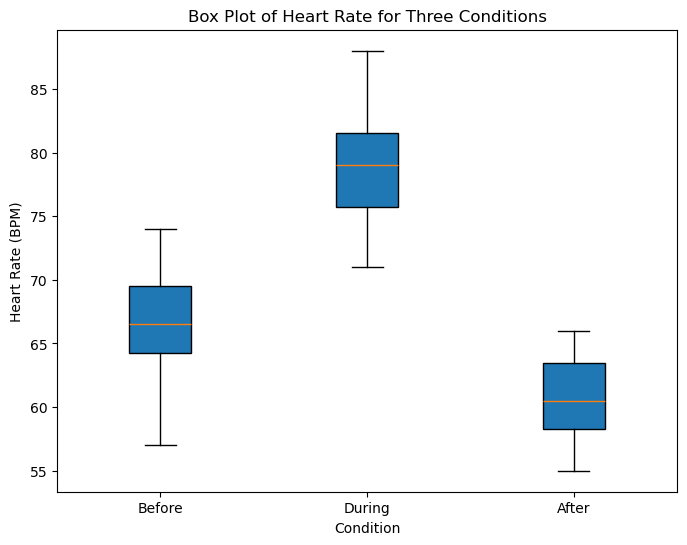

In [99]:
plt.figure(figsize=(8, 6))
plt.boxplot([before, during, after], labels=['Before', 'During', 'After'], patch_artist=True)
plt.title('Box Plot of Heart Rate for Three Conditions')
plt.xlabel('Condition')
plt.ylabel('Heart Rate (BPM)')
plt.show()

This test is very useful when you have repeated measurements or matched groups. It ranks the data across all groups, compares the ranks for each subject, and checks if the ranks differ significantly. Suppose you are studying the heart rate of individuals under three different exercise conditions: before exercise, during exercise, and after exercise. You measure their heart rates in each of these conditions and use the Friedman Test to determine if their heart rate distributions differ significantly between these conditions.

# bringing all tests together 

In [100]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])
group_1 = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])  # Group 1
group_2 = np.array([75, 80, 78, 71, 85, 79, 72, 82, 88, 79])  # Group 2
group_3 = np.array([55, 60, 58, 64, 65, 62, 66, 57, 59, 61])  # Group 3
during = np.array([75, 80, 78, 71, 85, 79, 72, 82, 88, 79])

In [101]:
wilcoxon_stat, wilcoxon_p = st.wilcoxon(before, after)

# Mann-Whitney U Test (Group 1 vs Group 2)
mannwhitney_stat, mannwhitney_p = st.mannwhitneyu(group_1, group_2, alternative='two-sided')

# Kruskal-Wallis H Test (Group 1 vs Group 2 vs Group 3)
kruskal_stat, kruskal_p = st.kruskal(group_1, group_2, group_3)

# Friedman Test (Before vs During vs After)
friedman_stat, friedman_p = st.friedmanchisquare(before, during, after)

C:\Users\keith\AppData\Local\Temp\ipykernel_8548\1033986209.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot([before, after], labels=['Before', 'After'], patch_artist=True)
C:\Users\keith\AppData\Local\Temp\ipykernel_8548\1033986209.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot([group_1, group_2], labels=['Group 1', 'Group 2'], patch_artist=True)
C:\Users\keith\AppData\Local\Temp\ipykernel_8548\1033986209.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot([group_1, group_2, group_3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True)
C:\Users\k

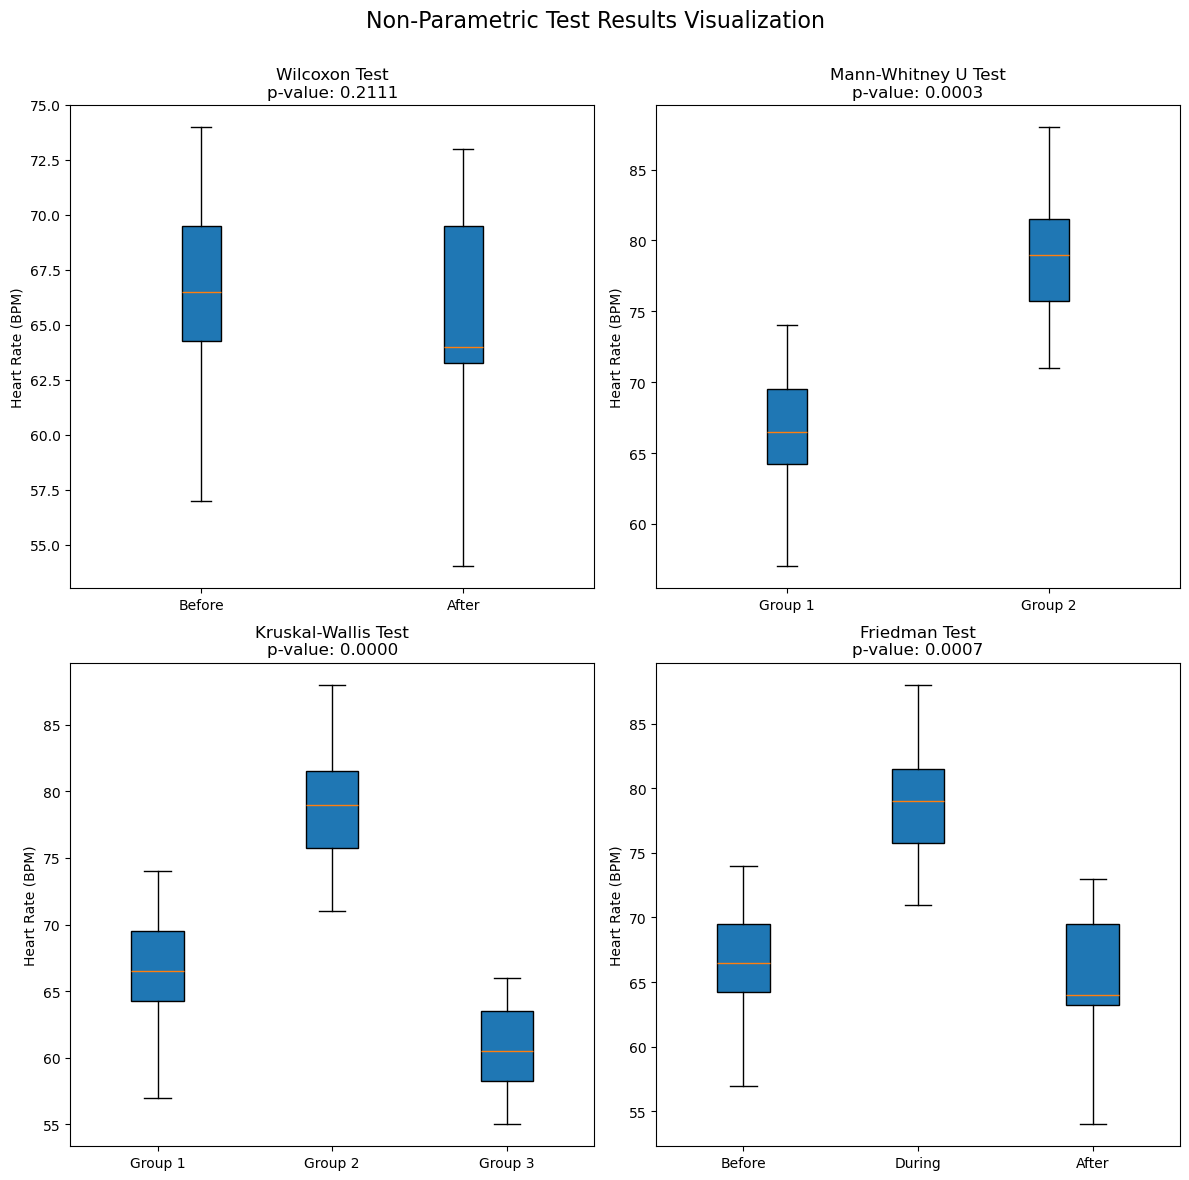

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot 1: Wilcoxon Signed-Rank Test (Before vs After)
axs[0, 0].boxplot([before, after], labels=['Before', 'After'], patch_artist=True)
axs[0, 0].set_title(f"Wilcoxon Test\np-value: {wilcoxon_p:.4f}")
axs[0, 0].set_ylabel('Heart Rate (BPM)')

# Plot 2: Mann-Whitney U Test (Group 1 vs Group 2)
axs[0, 1].boxplot([group_1, group_2], labels=['Group 1', 'Group 2'], patch_artist=True)
axs[0, 1].set_title(f"Mann-Whitney U Test\np-value: {mannwhitney_p:.4f}")
axs[0, 1].set_ylabel('Heart Rate (BPM)')

# Plot 3: Kruskal-Wallis H Test (Group 1 vs Group 2 vs Group 3)
axs[1, 0].boxplot([group_1, group_2, group_3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True)
axs[1, 0].set_title(f"Kruskal-Wallis Test\np-value: {kruskal_p:.4f}")
axs[1, 0].set_ylabel('Heart Rate (BPM)')

# Plot 4: Friedman Test (Before vs During vs After)
axs[1, 1].boxplot([before, during, after], labels=['Before', 'During', 'After'], patch_artist=True)
axs[1, 1].set_title(f"Friedman Test\np-value: {friedman_p:.4f}")
axs[1, 1].set_ylabel('Heart Rate (BPM)')

# Add overall title
fig.suptitle('Non-Parametric Test Results Visualization', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the title space

# Show the plot
plt.show()

# Conclusion

In this section, we explored four key non-parametric tests: the Wilcoxon Signed-Rank Test, the Mann-Whitney U Test, the Kruskal-Wallis H Test, and the Friedman Test. Each of these tests offers a valuable alternative to traditional parametric tests when the assumptions of normality or equal variances are not met. Here's a summary of what each test provides:

Wilcoxon Signed-Rank Test:

This test was applied to compare paired data, such as measurements before and after an intervention. It does not require the data to follow a normal distribution and is based on the ranks of the differences between paired observations. The test helps determine whether there is a significant difference between the two related samples.
Mann-Whitney U Test:

This test is used for comparing two independent groups when the assumptions of the independent t-test (normality) are violated. By ranking the data from both groups, it assesses whether the distributions of the two groups are significantly different. This test is particularly useful when working with ordinal data or when the sample size is small.
Kruskal-Wallis H Test:

This test is an extension of the Mann-Whitney U test, allowing for the comparison of more than two independent groups. It tests whether there is a significant difference in the distributions across multiple groups. Like the Mann-Whitney U test, it ranks the data and assesses whether the groups come from the same population.
Friedman Test:

When dealing with repeated measures or related groups, the Friedman Test is the non-parametric alternative to repeated measures ANOVA. It helps assess whether there are differences in the distributions of three or more related groups, making it ideal for experiments where the same subjects are measured multiple times under different conditions.
Key Takeaways:
Flexibility: Non-parametric tests are more flexible than their parametric counterparts, especially when the data does not meet the assumptions of normality or when dealing with ordinal data.
Practical Application: These tests are widely used in fields such as clinical research, psychology, and education, where data may not always conform to normal distributions.
Interpretation of Results: By performing these tests, we are able to assess the significance of differences between groups or conditions without relying on strict assumptions, making the conclusions more robust and reliable when working with real-world data.
Visual Insights:
The plots created for each test (Wilcoxon, Mann-Whitney U, Kruskal-Wallis, and Friedman) give a clear visual representation of the data distributions and the results of the statistical tests. The p-values displayed in the plots provide an easy reference for determining whether any differences between groups or conditions are statistically significant.

In conclusion, mastering these non-parametric tests greatly enhances the ability to conduct reliable statistical analysis when dealing with non-normally distributed data or small sample sizes. They offer a powerful alternative to parametric methods, especially when assumptions are not met.

------------------------------------------------------------------------------

# Multivariate Analysis

Multivariate analysis involves examining the relationships between multiple variables at the same time. It’s an essential technique for understanding complex data and making predictions or insights from more than one variable. In many real-world scenarios, we’re dealing with datasets that have more than one feature (or variable), and multivariate analysis helps to uncover patterns, relationships, and dependencies among these variables.

Multivariate analysis techniques are widely used in fields like economics, marketing, healthcare, social sciences, and machine learning. Let's explore a few common multivariate analysis techniques, starting with Principal Component Analysis (PCA), which is often used for dimensionality reduction. 

principal Component Analysis (PCA)
PCA is a technique used to reduce the dimensionality of large datasets, increasing interpretability while minimizing information loss. It transforms a set of correlated variables into a smaller set of uncorrelated variables called principal components. These components capture the most variance in the data.

When to Use PCA:
When you have a large number of features and want to reduce the dimensionality of the dataset while retaining most of the variability in the data.
When you're dealing with highly correlated data and want to discover the most important components (features) that explain the variance in the data.


In [103]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [104]:
iris = load_iris() 
X  = iris.data 
y = iris.target

In [105]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [106]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [107]:
explained_variance = pca.explained_variance_ratio_

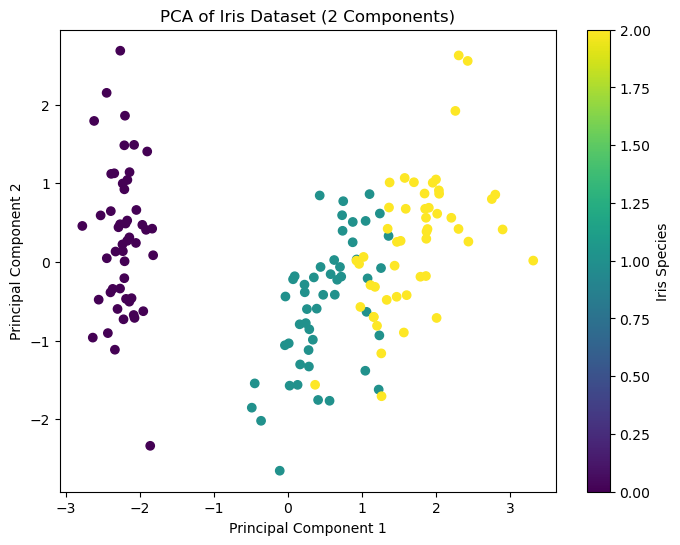

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Iris Species')
plt.show()


In [109]:
print(f"Explained Variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained Variance by Component 2: {explained_variance[1]:.2f}")

Explained Variance by Component 1: 0.73
Explained Variance by Component 2: 0.23


PCA with More Components and Explained Variance

In [110]:
pca_all = PCA(n_components=4)
x_pca_all = pca_all.fit_transform(X_scaled)

In [111]:
explained_variance_all = pca_all.explained_variance_ratio_

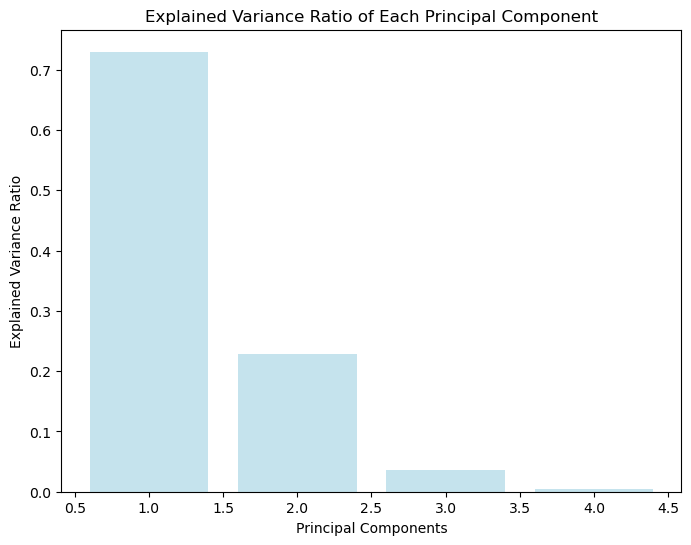

In [112]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), explained_variance_all, color='lightblue', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.show()


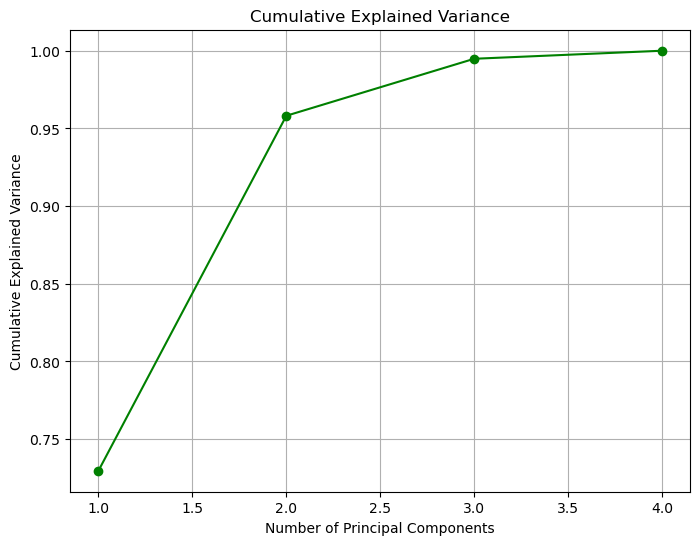

In [113]:
cumulative_variance = np.cumsum(explained_variance_all)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [114]:
for i, var in enumerate(explained_variance_all):
    print(f"Principal Component {i+1}: {var:.2f} variance explained")

Principal Component 1: 0.73 variance explained
Principal Component 2: 0.23 variance explained
Principal Component 3: 0.04 variance explained
Principal Component 4: 0.01 variance explained


Explained Variance: This plot shows how much variance each principal component explains. The first component captures most of the variance, and the second component captures the next largest amount.
Cumulative Explained Variance: This cumulative plot helps visualize how many components are needed to retain a substantial amount of the variance. For example.

Scree Plot (Elbow Method) for PCA
The Scree Plot is a helpful tool for determining the number of principal components to retain. It plots the eigenvalues (or explained variance) for each component. The "elbow" in the plot indicates the point where adding more components doesn’t significantly increase the explained variance.

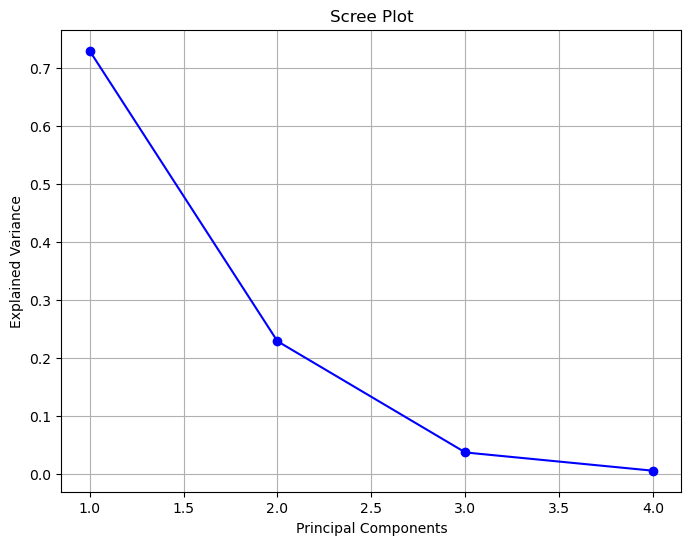

In [115]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), explained_variance_all, marker='o', color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


# Factor Analysis
Factor Analysis (FA) is a technique used to identify latent variables (factors) that explain the correlations between observed variables. It's often used in situations where you want to reduce the dimensionality of the data, but unlike PCA, which focuses purely on variance, FA tries to identify underlying structures or factors that explain the observed variables.

Factor analysis is widely used in fields like psychology, marketing, and social sciences to uncover hidden relationships between variables, such as finding common factors that explain the variance in a set of measurements.

Steps in Factor Analysis:
Modeling the correlations: Factor analysis assumes that the observed variables are linear combinations of some underlying latent variables (factors).
Extraction of factors: The process extracts factors that explain the observed correlations, typically using methods like Principal Axis Factoring or Maximum Likelihood Estimation.
Rotation: To make the factors more interpretable, rotation methods like Varimax (orthogonal rotation) or Oblimin (oblique rotation) can be used.

In [116]:
from sklearn.decomposition import FactorAnalysis 

iris = load_iris() 
X = iris.data

In [117]:
factor = FactorAnalysis(n_components=2)
X_fa = factor.fit_transform(X)

In [118]:
explained_variance_fa = factor.noise_variance_

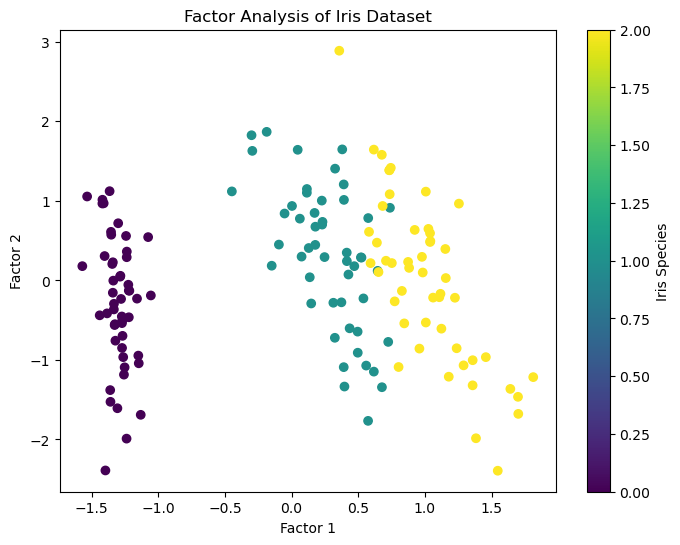

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=iris.target, cmap='viridis')
plt.title('Factor Analysis of Iris Dataset')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.colorbar(label='Iris Species')
plt.show()

In [120]:
print(f"Explained variance of Factor 1: {explained_variance_fa[0]:.2f}")
print(f"Explained variance of Factor 2: {explained_variance_fa[1]:.2f}")

Explained variance of Factor 1: 0.02
Explained variance of Factor 2: 0.10


# Canonical Correlation Analysis (CCA)

Canonical Correlation Analysis (CCA) is a multivariate statistical technique used to understand the relationship between two sets of variables. It identifies the linear combinations (canonical variables) of each set of variables that are maximally correlated.

CCA is widely used in situations where you have two sets of variables and want to explore how the variables in one set are related to the variables in another set. For example, you might want to understand how different measures of physical health relate to lifestyle variables.

Steps in CCA:
Define two sets of variables: CCA works by identifying linear combinations of two sets of variables that are maximally correlated.
Calculate canonical correlation coefficients: These coefficients represent the strength of the linear relationship between the two sets.
Interpret the canonical variates: The canonical variates represent the relationships between the two sets of variables.



In [121]:
from sklearn.cross_decomposition import CCA

In [122]:
X1 = iris.data[:, :2]  # Sepal length and sepal width
X2 = iris.data[:, 2:]  # Petal length and petal width

In [123]:
cca = CCA(n_components=1)
cca.fit(X1, X2)

CCA(n_components=1)

In [124]:
X1_c, X2_c = cca.transform(X1, X2)

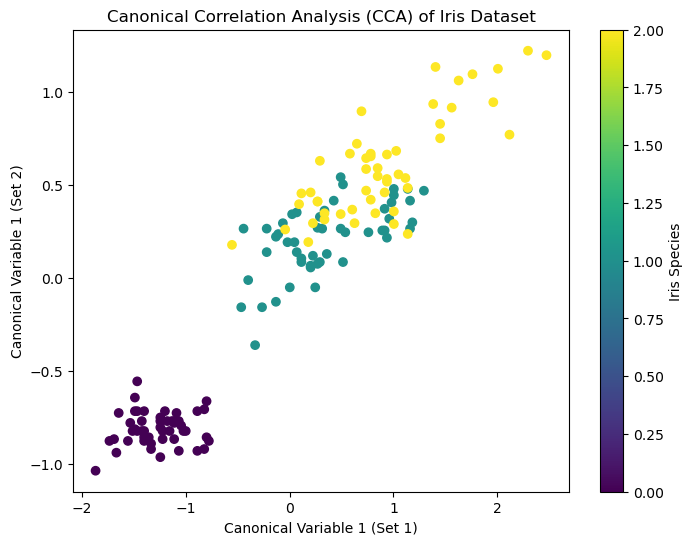

In [125]:
plt.figure(figsize=(8, 6))
plt.scatter(X1_c, X2_c, c=iris.target, cmap='viridis')
plt.title('Canonical Correlation Analysis (CCA) of Iris Dataset')
plt.xlabel('Canonical Variable 1 (Set 1)')
plt.ylabel('Canonical Variable 1 (Set 2)')
plt.colorbar(label='Iris Species')
plt.show()

In [126]:
print(f"Canonical Correlation Coefficient: {cca.score(X1, X2):.2f}")

Canonical Correlation Coefficient: 0.34


# Multiple Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [128]:
X = iris.data[:, :-1]
y = iris.data[:, -1]


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [132]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.4f}")

Coefficients: [-0.25113971  0.25971605  0.54009078]
Intercept: -0.16560909133062895
Mean Squared Error: 0.0377


# Cluster Analysis (K-Means Clustering) 

K-Means clustering is a popular method for unsupervised learning. It is used to group data points into clusters based on similarity. Each point belongs to the cluster whose centroid is the nearest.

In [133]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

c:\Users\keith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

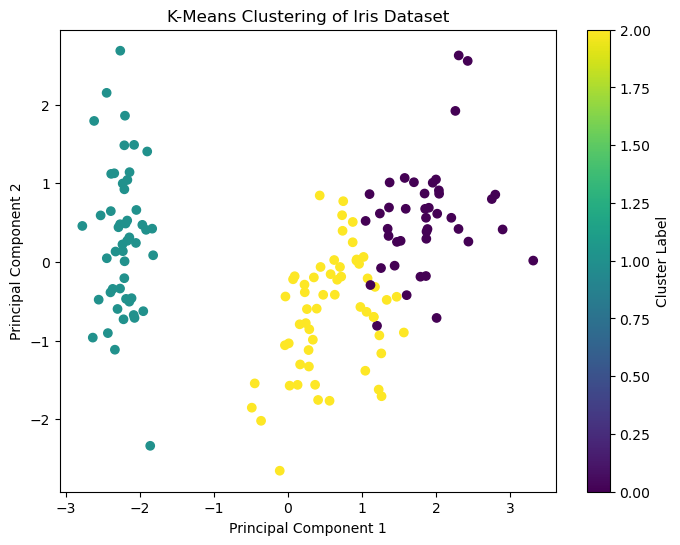

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Conclusion for Multivariate Analysis Section
In this section, we explored several powerful multivariate analysis techniques, focusing on Principal Component Analysis (PCA), Factor Analysis (FA), and Canonical Correlation Analysis (CCA). These techniques allow us to analyze and understand complex datasets that involve multiple variables, providing insights into relationships, hidden structures, and dimensionality reduction.

Key Takeaways:
Principal Component Analysis (PCA):

Dimensionality Reduction: PCA is a critical tool for reducing the number of features in high-dimensional datasets while retaining as much variance as possible. It is widely used for visualizing and simplifying data, enabling more efficient processing without losing important information.
Variance Explained: PCA helps identify the most important variables in the dataset by explaining the variance in the data. The first few principal components capture the most significant features of the data, allowing us to focus on the most impactful components.
Factor Analysis (FA):

Latent Structures: Unlike PCA, which focuses on variance, Factor Analysis is used to uncover hidden factors or underlying variables that explain the correlations between observed variables. It is particularly useful in fields like psychology and social sciences where latent constructs (e.g., intelligence, satisfaction) need to be identified and modeled.
Data Reduction and Interpretation: By extracting factors that explain relationships among variables, FA helps reduce complexity while making the data more interpretable.
Canonical Correlation Analysis (CCA):

Exploring Relationships Between Two Sets of Variables: CCA is a powerful method when you have two sets of variables and want to understand the relationship between them. It finds linear combinations of both sets that are maximally correlated, providing insight into how different variable sets interact.
Real-World Applications: CCA is useful in various fields, such as economics, where you might explore the relationship between two sets of variables, like financial indicators and market performance, or in biology to understand the relationship between gene expression and phenotypic traits.
Overall Insights:
Dimensionality Reduction: Techniques like PCA and FA allow us to reduce the complexity of data without losing much information, which is especially helpful in large datasets with many variables. This reduction in dimensions makes it easier to visualize and analyze data.
Multivariate Relationships: CCA extends this idea by focusing on the relationship between two distinct sets of variables, providing more targeted insights into how different aspects of the data are related.
Practical Applications:
These multivariate techniques are indispensable for exploratory data analysis and predictive modeling. Whether you're working with large datasets in machine learning, trying to uncover underlying factors in social science surveys, or exploring how different aspects of data interact, these tools provide crucial insights.
Conclusion:
By using PCA, Factor Analysis, and CCA, analysts and researchers can uncover valuable insights from complex multivariate data. These techniques are vital in reducing complexity, improving interpretability, and making data-driven decisions based on the underlying structure and relationships in the data. By mastering these methods, you can significantly enhance your ability to perform deep analyses, create efficient models, and make well-informed predictions.

With these powerful tools, you are better equipped to tackle datasets with multiple variables, ensuring more accurate and meaningful analysis.

# References

- (No date a) [Lesson 27: The Central Limit Theorem](https://online.stat.psu.edu/stat414/book/export/html/750)
- (No date b) [Khan Academy](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library)
- 4.5 - Fisher’s exact test: [Stat 504 (no date) PennState: Statistics Online Courses](https://online.stat.psu.edu/stat504/lesson/4/4.5)
- 7. The T tests: [The BMJ (2020)](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests) (Accessed: 17 December 2024).
- [Analysis of variance (2024)](https://en.wikipedia.org/wiki/Analysis_of_variance) Wikipedia.
- [AuthorityJ (2024)](https://medium.com/@austinej86/understanding-the-shapiro-wilk-test-a-key-tool-for-testing-normality-14ae5107b6b5) Understanding the Shapiro-Wilk test: A key tool for testing normality, Medium.
- [Beck, K. (2022)](https://www.sciencing.com/what-is-the-tukey-hsd-test-12751748/) What is the Tukey HSD test?, Sciencing.
- [Brownlee, J. (2019)](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) How to code the student’s T-test from scratch in Python, MachineLearningMastery.com.
- [Brownlee, J. (2020)](https://machinelearningmastery.com/probability-density-estimation/) A gentle introduction to probability density estimation, MachineLearningMastery.com.
- [Brownlee, J. (2021)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) 17 statistical hypothesis tests in Python (cheat sheet), MachineLearningMastery.com.
- Comment, info, M., K kamaljeet69420, et al. (2024) [Central limit theorem in statistics: Formula, derivation, examples & proof](https://www.geeksforgeeks.org/central-limit-theorem/), GeeksforGeeks.
- Comment, info, M., P [T-test](https://www.geeksforgeeks.org/t-test/), GeeksforGeeks.
- [Normal distribution: Definition, formula, properties of normal distribution](https://www.geeksforgeeks.org/normal-distribution/) GeeksforGeeks. (Accessed: 17 December 2024).
- [Degrees of freedom: Definition, examples (2024)](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/) Statistics How To.
- Fisher, R.A. (1974) *The design of Experiments*. New York: Hafner Press.
- [Frost, J. (2022)](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/) Degrees of freedom in statistics, Statistics By Jim.
- [Frost, J. (2024)](https://statisticsbyjim.com/hypothesis-testing/t-test/) T test overview: How to use & examples, Statistics By Jim.
- [GeeksforGeeks (2023)](https://www.geeksforgeeks.org/levenes-test/) Levene’s Test, GeeksforGeeks.
- [GeeksforGeeks (2024a)](https://www.geeksforgeeks.org/anova-formula/) ANOVA formula in statistics with solved examples and FAQs, GeeksforGeeks.
- [GeeksforGeeks (2024b)](https://www.geeksforgeeks.org/cumulative-distribution-function/) Cumulative distribution function, GeeksforGeeks.
- [GeeksforGeeks (2024c)](https://www.geeksforgeeks.org/normal-distribution-plot-using-numpy-and-matplotlib/) Normal distribution plot using Numpy and Matplotlib, GeeksforGeeks.
- [GeeksforGeeks (2024d)](https://www.geeksforgeeks.org/quantile-quantile-plots/) Quantile quantile plots, GeeksforGeeks.
- [Gurchetan (2024)](https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/) What is analysis of variance (ANOVA)?, Analytics Vidhya.
- [Hernández, K. (2023)](https://medium.com/random-noise/fishers-exact-test-explained-implementation-in-python-4f186c7e44f6) Fisher’s exact test explained & Example in Python, Medium (Accessed: 17 December 2024).
- [Introduction to probability (no date)](https://ethanweed.github.io/pythonbook/04.02-probability.html) 10. Introduction to Probability - Learning Statistics with Python.
- [Jonykoren (no date)](https://github.com/jonykoren/Lady_Tasting_Tea/blob/main/python/Lady%20Tasting%20Tea.ipynb) LADY_TASTING_TEA/python/lady tasting tea.ipynb at main · Jonykoren/Lady_tasting_tea, GitHub.
- [Kenton, W. (no date)](https://www.investopedia.com/terms/a/anova.asp) What is analysis of variance (ANOVA)?, Investopedia.
- [Lady tasting tea (no date)](https://lisds.github.io/textbook/wild-pandas/fishers_tea.html) Lady tasting tea - Introduction to Data Science.
- [Learn-Co-Students (no date)](https://github.com/learn-co-students/dsc-2-20-11type-1-and-type-2-errors-lab-nyc-ds-career-012819) Learn-co-students/DSC-2-20-11TYPE-1-AND-TYPE-2-ERRORS-LAB-NYC-DS-CAREER-012819, GitHub.
- [Levene’s Test (2024)](https://en.wikipedia.org/wiki/Levene%27s_test) Wikipedia.
- [Normal distribution (no date)](https://mathworld.wolfram.com/NormalDistribution.html) from Wolfram MathWorld.
- [Probplot# (no date)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) probplot - SciPy v1.14.1 Manual.
- [Shapiro# (no date)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) shapiro - SciPy v1.14.1 Manual.
- [Student’s t-test (2024a)](https://simple.wikipedia.org/wiki/Student’s_t-test) Wikipedia.
- [Student’s t-test (2024b)](https://www.britannica.com/science/Students-t-test) Encyclopædia Britannica.
- [Tukey test / tukey procedure / honest significant difference (2024)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/) Statistics How To.
- [Winkler, A.M. et al. (2019)](https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/) The lady tasting tea experiment, Brainder.
- [Zach BobbittHey there. My name is Zach Bobbitt. I have a Masters of Science degree in Applied Statistics and I’ve worked on machine learning algorithms for professional businesses in both healthcare and retail. I’m passionate about statistics (2020)](https://www.statology.org/binomial-test-python/) How to perform a binomial test in Python, Statology.
- [Zach BobbittHey there. My name is Zach Bobbitt. I have a Masters of Science degree in Applied Statistics and I’ve worked on machine learning algorithms for professional businesses in both healthcare and retail. I’m passionate about statistics (2022)](https://www.statology.org/cohens-kappa-python/#:~:text=The%20following%20code%20shows%20how%20to%20use%20the,0%2C%201%2C%200%5D%20%23calculate%20Cohen%27s%20Kappa%20cohen_kappa_score%28rater1%2C%20rater2%29) How to calculate Cohen’s kappa in python, Statology.


------------------------------------------------------------------------

end of notebook 